# Imports and paths

In [1]:
import pandas as pd
import os
import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
np.__version__

'1.16.4'

In [2]:
idat_dir='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/'

#samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet.csv'
#samplesheets_keepers='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet_keepers.csv'

samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/299_Erlangener_Faelle_850K_edited_SJ_KK.xlsx'
#FCD_1a_2a_2b_TSC_PMG.xlsx'
#Erlangener_Faelle_850K_edited_SJ.xlsx'
#299_Erlangener_Faelle_850K_edited_SJ.xlsx

phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'

output_path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/preprocess_outputs/'
output_pickle=output_path+'methyl_array.pkl'

glob.glob('/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')


['/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R04C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R01C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R07C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R03C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R05C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R06C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R02C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/2029

In [3]:
#basenamelist=glob.glob(path+'*/*.idat');basenamelist[:4]

## Processing of phenosheet 

In [3]:
import IDAT_Processor
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
from IDAT_Processor import PreProcessIDATs, PreProcessPhenoData

In [5]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [6]:
pheno_sheet = pd.read_excel(samplesheet,header=0);pheno_sheet

ID  ID_MATERIAL_TYP             txt_idat  ALTER OP  ALTER Beginn  \
0    131972            54938  202818860053_R04C01      11.0           0.0   
1    131974            54939  202818860053_R05C01      11.0           0.0   
2    131976            54940  202818860053_R06C01      27.0           0.0   
3    131978            54941  202818860053_R07C01      27.0           0.0   
4    131980            54942  202818860053_R08C01      27.0           0.0   
..      ...              ...                  ...       ...           ...   
287  134752            56533  203220070086_R07C01       1.0           0.0   
288  134754            56534  203220070086_R08C01       3.0           0.0   
289  134756            56535  203220070058_R01C01       1.0           0.0   
290  134758            56536  203220070058_R02C01       1.0           0.0   
291  134760            56537  203220070058_R03C01       1.0           0.0   

     DAUER Dauer Gruppe SUPPLIER_NUMBER    Lokalisation Lokalisation Gruppe  \
0      0.0            0    SN 83/10 III  temporal - NCx              Cortex   
1      0.0            0    SN 83/10 III   temporal - WM           Marklager   
2      0.0            0   SN 120/16 III  temporal - NCx              Cortex   
3      0.0            0   SN 120/16 III   temporal - WM           Marklager   
4      0.0            0     SN 120/16 I   frontal - NCx              Cortex   
..     ...          ...             ...             ...                 ...   
287    1.0          1-5     1467/16 III         frontal            gemischt   
288    3.0          1-5       1061/17 7         frontal            gemischt   
289    1.0          1-5     1714/17 II2         frontal            gemischt   
290    1.0          1-5      182/18 IV1         frontal            gemischt   
291    1.0          1-5       1909/17 6         frontal            gemischt   

     ... PATIENT_GESCHLECHT KLINIK icEEG DNA Cluster  \
0    ...                  f   UKER   NaN        FFPE   
1    ...                  f   UKER   NaN        FFPE   
2    ...                  m   UKER   NaN        FFPE   
3    ...                  m   UKER   NaN        FFPE   
4    ...                  m   UKER   NaN        FFPE   
..   ...                ...    ...   ...         ...   
287  ...                  m   Mara   NaN        FFPE   
288  ...                  f   Mara   NaN        FFPE   
289  ...                  m   Mara   NaN        FFPE   
290  ...                  m   Mara   NaN        FFPE   
291  ...                  f    VGT   NaN        FFPE   

                                         txt_KOMMENTAR    PATIENT_NACHNAME  \
0    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
1    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
2    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
3    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
4    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
..                                                 ...                 ...   
287  Epilepsie seit der 1. Lebenswoche bei gesicher...         1467/16 III   
288  Frontallappenepilepsie links bei tuberöser Skl...           1061/17 7   
289  Links frontale Epilepsie bei tuberöser Skleros...         1714/17 II2   
290   Rechts frontale Epilepsie bei tuberöser Sklerose          182/18 IV1   
291  Epilepsie rechts zentral/frontal bei tuberöser...           1909/17 6   

    PATIENT_VORNAME dat_PATIENT_GEBURTSTAG v11b4_MaxCalScore  \
0              UKER               00:00:00           0,4535    
1              UKER               00:00:00           0,0147    
2              UKER               00:00:00           0,2614    
3              UKER               00:00:00           0,0101    
4              UKER               00:00:00           0,1998    
..              ...                    ...               ...   
287            Mara               00:00:00           0,2662    
288          

In [7]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Cluster DX', 
              include_columns={'ALTER Beginn':'age_onset',
                               'ALTER OP':'age_surgery',
                               'DAUER':'duration',                               
                               #'Lokalisation':'localisation', 
                               'Einsenderdiagnose':'diagnosis',
                               'KLINIK':'center',
                               'PATIENT_GESCHLECHT':'sex',
                               'SUPPLIER_NUMBER':'case_ID', 
                               'txt_idat':'identifier',
                               'Dauer Gruppe': 'duration_group',
                               'Lokalisation Gruppe': 'location_wm_cx',
                               'Lokalisation Cluster': 'location_region'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [8]:
phenodata.format_sex_column('m','f')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01  
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01  
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01  
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01  
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01  
..             ...  ..            ...     ...                  ...  
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01  
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01  
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01  
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01  
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01  

[292 rows x 14 columns]

In [9]:
phenodata.create_ID(disease='disease', sample='identifier')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [10]:
phenodata.pheno_sheet.isnull().sum()


age_onset          94
age_surgery         1
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              4
location_region     4
location_wm_cx      4
sex                 1
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [11]:
keys=['age_surgery','center', 'location_region','location_wm_cx', 'sex']

In [12]:
imputation_df=phenodata.pheno_sheet[keys]; imputation_df

age_surgery center location_region location_wm_cx sex
0           11.0   UKER        temporal         Cortex   F
1           11.0   UKER        temporal      Marklager   F
2           27.0   UKER        temporal         Cortex   M
3           27.0   UKER        temporal      Marklager   M
4           27.0   UKER         frontal         Cortex   M
..           ...    ...             ...            ...  ..
287          1.0   Mara         frontal       gemischt   M
288          3.0   Mara         frontal       gemischt   F
289          1.0   Mara         frontal       gemischt   M
290          1.0   Mara         frontal       gemischt   M
291          1.0    VGT         frontal       gemischt   F

[292 rows x 5 columns]

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(imputation_df)
test_pheno=pd.DataFrame(imp.transform(imputation_df),index = imputation_df.index.to_numpy(),
                  columns=imputation_df.columns)
#imputed=imp.transform(phenodata.pheno_sheet)    
test_pheno.isnull().sum()

age_surgery        0
center             0
location_region    0
location_wm_cx     0
sex                0
dtype: int64

In [14]:
phenodata.pheno_sheet[keys]=test_pheno.to_numpy()

In [15]:
phenodata.pheno_sheet.isnull().sum()

age_onset          94
age_surgery         0
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              0
location_region     0
location_wm_cx      0
sex                 0
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [16]:
#pheno_sheet=phenodata.format_custom(
#              basename_col='txt_idat', 
#              disease_class_column='Diagnosis', 
#              include_columns={'age':'age',
#                               'sex':'sex',
#                               'Center':'Center',
#                               'Sample':'Sample', 
#                               'Lokalisation':'Lokalisation', 
#                               #'txt_idat':'txt_idat'
#                              }
#                       )

In [17]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [18]:
exclude_disease_list=[
 
 'FCD 1A',
 
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 
 'mMCD',
 'MOGHE',
 
 'TLE/CTRL',
 'TSC'
 ]
phenodata.pheno_sheet['disease'].unique().tolist()

['CTRL',
 'FCD 1A',
 'FCD 2A',
 'FCD 2B',
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 'HME',
 'mMCD',
 'MOGHE',
 'PMG',
 'PMG_1q',
 'TLE/CTRL',
 'TSC']

In [19]:
phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)]

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
253        0.0          3.0   
254        0.2          1.0   
255        0.9          2.0   
256       11.0         17.0   
257        NaN         15.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
253  /home/Deep_Learner/private/network/Methyl_Arra...  b203219750116   
254  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
255  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
256  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
257  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
253       3.0            1-5            PMG    VGT         frontal   
254       0.8            1-5         PMG 1q   Mara         frontal   
255       1.1            1-5            PMG   Mara         frontal   
256       6.0           5-10            PMG    VGT        temporal   
257       NaN            NaN         PMG 1q    VGT             NOS   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
253       gemischt   M       372/15 5     PMG  203219750116_R08C01   
254       gemischt   F    741/15 III2  PMG_1q  203219730055_R03C01   
255       gemischt   M     1266/15 I4     PMG  203219730055_R04C01   
256       gemischt   F      592/18 I1     PMG  203219730055_R05C01   
257       gemischt   F       633/18 6  PMG_1q  203219730055_R06C01   

                             ID  
0      CTRL.202818860053_R04C01  
1      CTRL.202818860053_R05C01  
2      CTRL.202818860053_R06C01  
3      CTRL.202818860053_R07C01  
4      CTRL.202818860053_R08C01  
..                          ...  
253     PMG.203219750116_R08C01  
254  PMG_1q.203219730055_R03C01  
255     PMG.203219730055_R04C01  
256     PMG.203219730055_R05C01  
257  PMG_1q.203219730055_R06C01  

[109 rows x 15 columns]

In [20]:
phenodata.remove_diseases(exclude_disease_list)

In [21]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
253        0.0          3.0   
254        0.2          1.0   
255        0.9          2.0   
256       11.0         17.0   
257        NaN         15.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
253  /home/Deep_Learner/private/network/Methyl_Arra...  b203219750116   
254  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
255  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
256  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
257  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
253       3.0            1-5            PMG    VGT         frontal   
254       0.8            1-5         PMG 1q   Mara         frontal   
255       1.1            1-5            PMG   Mara         frontal   
256       6.0           5-10            PMG    VGT        temporal   
257       NaN            NaN         PMG 1q    VGT             NOS   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
253       gemischt   M       372/15 5     PMG  203219750116_R08C01   
254       gemischt   F    741/15 III2  PMG_1q  203219730055_R03C01   
255       gemischt   M     1266/15 I4     PMG  203219730055_R04C01   
256       gemischt   F      592/18 I1     PMG  203219730055_R05C01   
257       gemischt   F       633/18 6  PMG_1q  203219730055_R06C01   

                             ID  
0      CTRL.202818860053_R04C01  
1      CTRL.202818860053_R05C01  
2      CTRL.202818860053_R06C01  
3      CTRL.202818860053_R07C01  
4      CTRL.202818860053_R08C01  
..                          ...  
253     PMG.203219750116_R08C01  
254  PMG_1q.203219730055_R03C01  
255     PMG.203219730055_R04C01  
256     PMG.203219730055_R05C01  
257  PMG_1q.203219730055_R06C01  

[109 rows x 15 columns]

In [22]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [23]:
#pheno_sheet.to_csv(phenosheet, index=False)

In [24]:
pd.read_csv(phenosheet, index_col=False)

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
104        0.0          3.0   
105        0.2          1.0   
106        0.9          2.0   
107       11.0         17.0   
108        NaN         15.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
104  /home/Deep_Learner/private/network/Methyl_Arra...  b203219750116   
105  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
106  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
107  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   
108  /home/Deep_Learner/private/network/Methyl_Arra...  b203219730055   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
104       3.0            1-5            PMG    VGT         frontal   
105       0.8            1-5         PMG 1q   Mara         frontal   
106       1.1            1-5            PMG   Mara         frontal   
107       6.0           5-10            PMG    VGT        temporal   
108       NaN            NaN         PMG 1q    VGT             NOS   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
104       gemischt   M       372/15 5     PMG  203219750116_R08C01   
105       gemischt   F    741/15 III2  PMG_1q  203219730055_R03C01   
106       gemischt   M     1266/15 I4     PMG  203219730055_R04C01   
107       gemischt   F      592/18 I1     PMG  203219730055_R05C01   
108       gemischt   F       633/18 6  PMG_1q  203219730055_R06C01   

                             ID  
0      CTRL.202818860053_R04C01  
1      CTRL.202818860053_R05C01  
2      CTRL.202818860053_R06C01  
3      CTRL.202818860053_R07C01  
4      CTRL.202818860053_R08C01  
..                          ...  
104     PMG.203219750116_R08C01  
105  PMG_1q.203219730055_R03C01  
106     PMG.203219730055_R04C01  
107     PMG.203219730055_R05C01  
108  PMG_1q.203219730055_R06C01  

[109 rows x 15 columns]

# IDAT Processing modified class

## Loading data

In [3]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [64]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version 3.9 (BiocManager 1.30.8), ?BiocManager::install for help


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version '3.9' is out-of-date; the current release version '3.10'
  is available with R version '3.6'; see https://bioconductor.org/install




In [5]:
import multiprocessing
n_workers=multiprocessing.cpu_count()
preproidat.load_idats(use_cache=True, rename_samples=True, parallel=True, nworkers=n_workers, verbose=True)

[1]
 "/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS//pheno_sheet.csv"




/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[read.metharray.sheet] Found the following CSV files:


/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



## Quality control plots

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


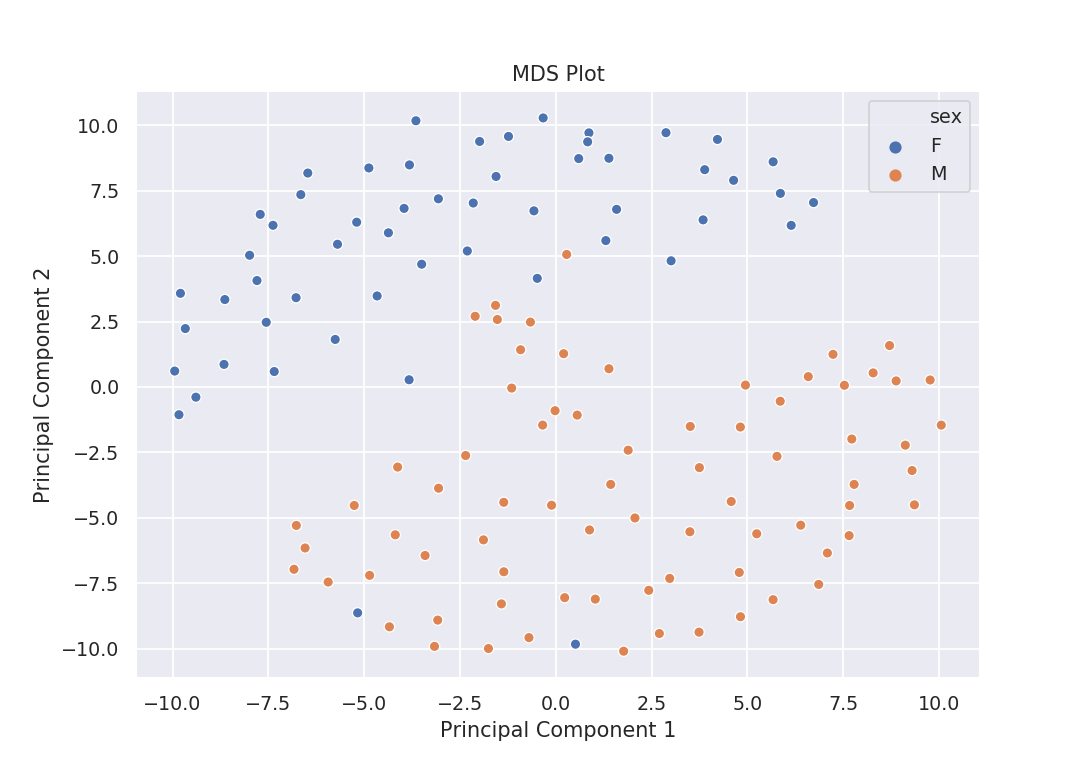

In [27]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
###dataframe=dataframe,pheno=pandas2ri.ri2py(preproidat.pheno),
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='sex', components=(0,1))

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



<IPython.core.display.Javascript object>


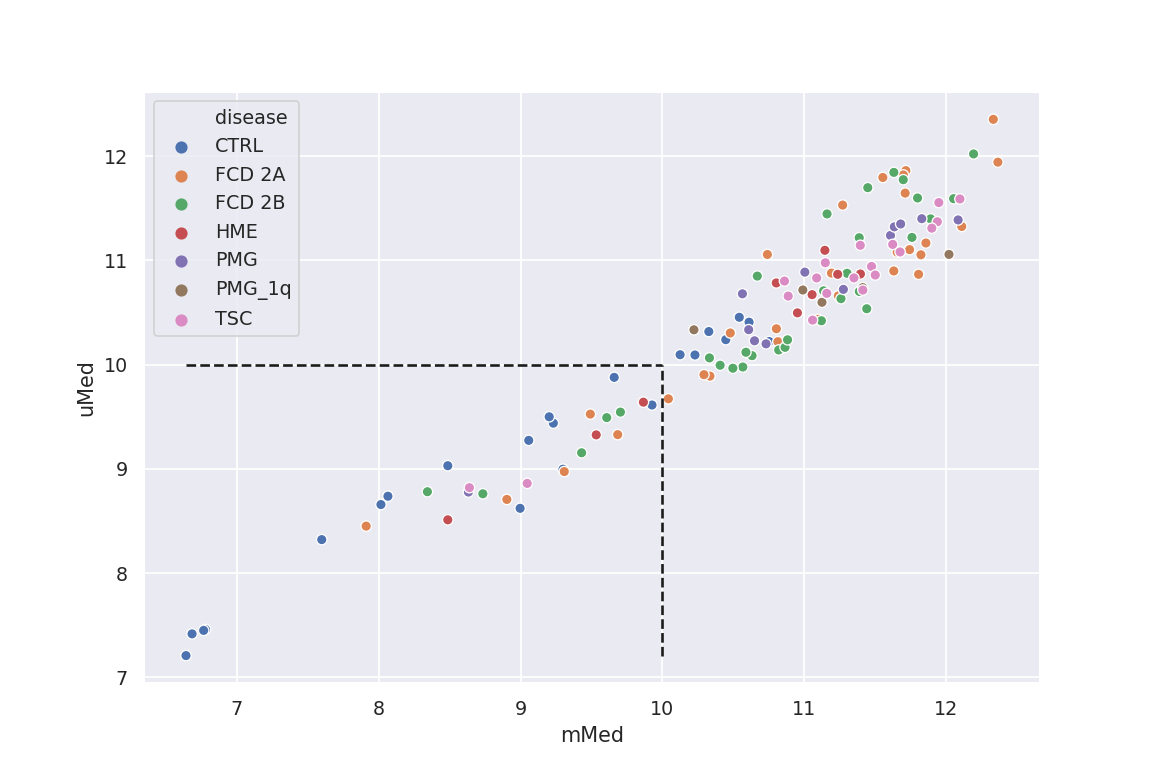

In [28]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='disease', thresh=10)     

<IPython.core.display.Javascript object>


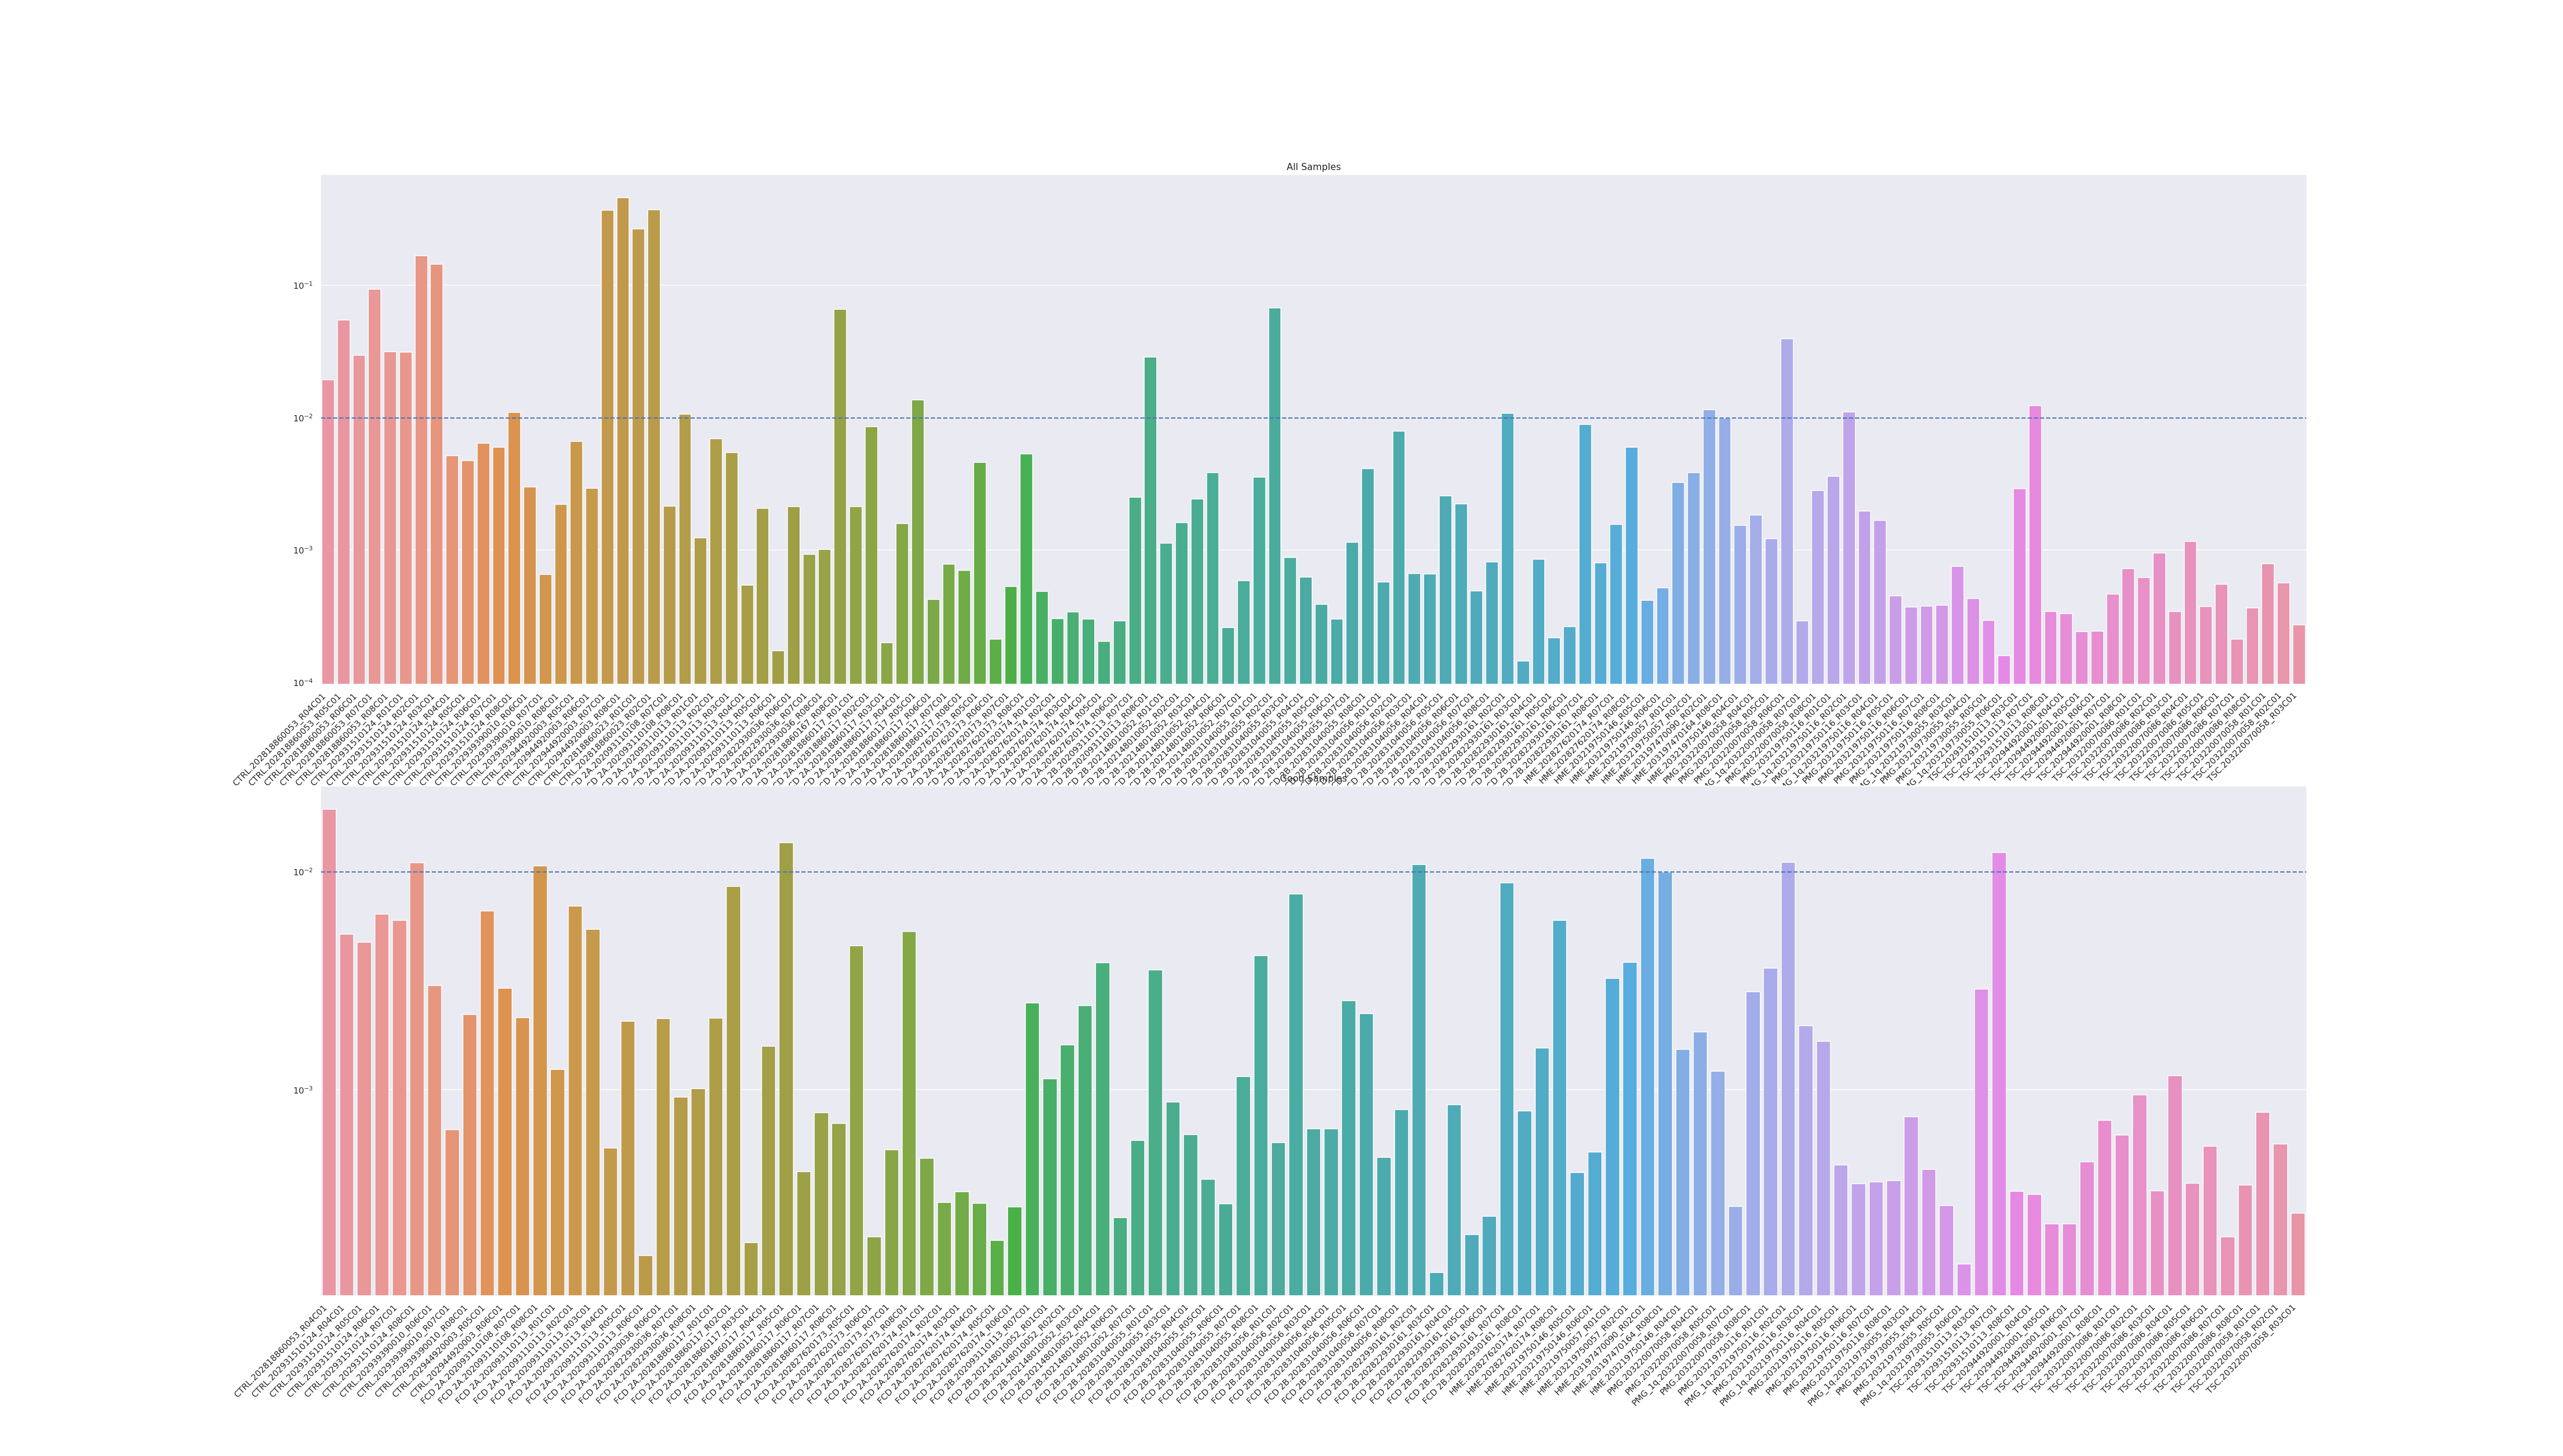

/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py:700: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



In [29]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
###########to_do##############
preproidat.plt_meandetP(detPcut=0.01, SampleCutoff=0.1, log_scale=True, plot='all')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


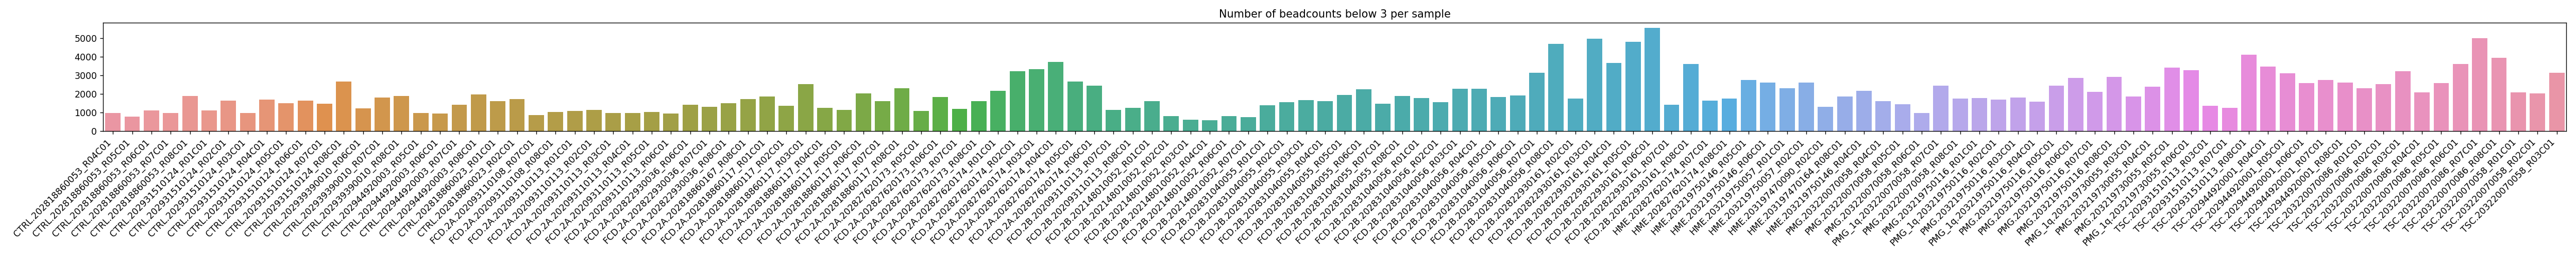

In [6]:
%matplotlib notebook
preproidat.plt_failedbeads(RGset=preproidat.RGset, percent=False)


In [6]:
mvals_raw,mvals= preproidat.getM(preproidat.RGset)
betas_raw,betas= preproidat.getBeta(preproidat.RGset)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


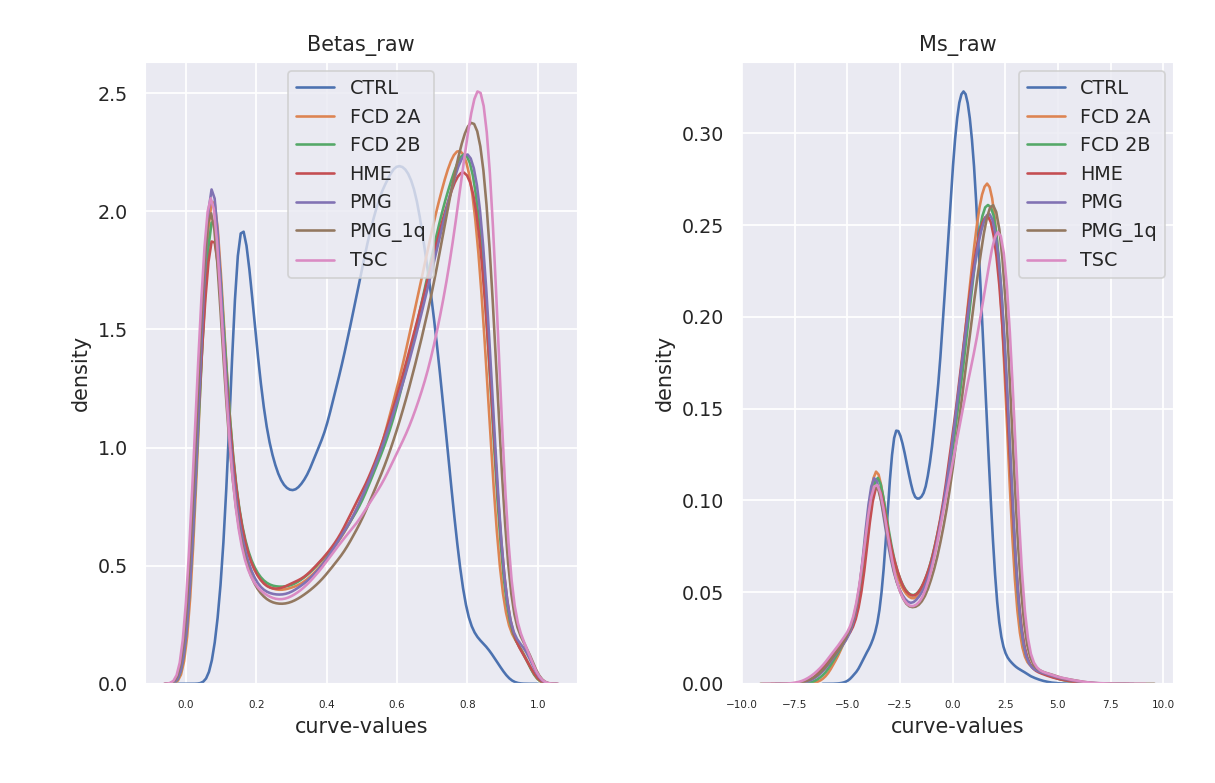

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [36]:
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw}, variant="grouped", group_by='disease', nrows=1)

<IPython.core.display.Javascript object>


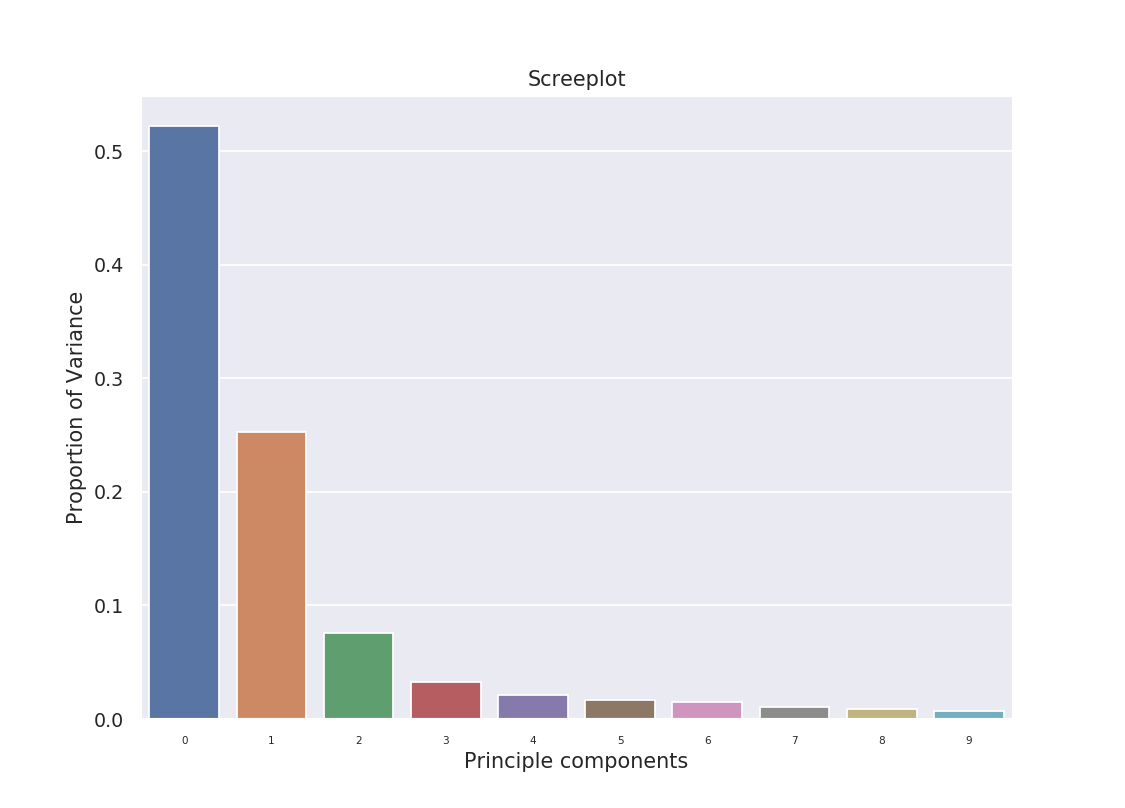

In [37]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

## Normalizing data

In [7]:
GRset,pheno=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False, RGset=preproidat.RGset)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Mapping to genome.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Fixing outliers.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[p

In [6]:
#grset=preproidat.preprocessFunnorm(celltype_adoption=True, use_cell_count2=False, nPCs=6)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessFunnorm] Background and dye bias correction with noob


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy

In [16]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          8.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          4.0  /home/D

## Filtering of probes and samples 

### DNAmArray Pipeline

In [55]:
beta_py, mval_py, pheno_py=preproidat.DNAmArray_processing(GRset=GRset, RGset=preproidat.RGset_orig, filterXY=True, 
                                                           filterNoCG=True, excludeXreactiveprobes=True, dropSnPs=True, 
                                                           cutbead=3, zeropoint=True, what="both", ProbeCutoff=0.27,
                                                           SampleCutoff=0.58, array_type='EPIC', 
                                                           badSampleCutoff=10, rm_badsamples=False, rm_badprobes=False,
                                                           detPFilter=False, detPcut=0.01, addQC=False, verbose=True, 
                                                           autoimpute=True, imputation_method="imputePCA")



 Now performing badsample removal

 Now performing probefiltering on beadcount
Filtering on number of beads... 

On average

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.




 
0.2
 
% of the probes (
 
1051815
 
) have number of beads below
 
3
 


Filtering on zero intensities... 

On average
 
0.005
 
% of the Type II probes (
 
723910
 
) have Red and/or Green intensity below 1 

On average
 
0.031
 
% of the Type I probes (
 
99908
 
), measured in Green channel, have intensity below 1 

On average
 
0.044
 
% of the Type I probes (
 
184454
 
), measured in Red channel, have intensity below 1 

Set filtered probes in Red and/or Green channels to NA... 

... done 
 
100
 
 out of 
 
109
 
 ... 


 Now removing bad probes 
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
951
 
 probes from the analysis.

 In total there were 
 
865859
 
 probes for the analysis before filtering.


 
402128
 
 probes have been removed from further analysis.

 In total there are
 
463731
 
 probes left for the analysis.

 Now performing reduce function
Calculate and filter on detection P-value..

In [56]:
pheno_py

age_onset  age_surgery                                           Basename  \
0         0.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1         0.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         0.0         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3         0.0         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         0.0         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
..        ...          ...                                                ...   
83        3.0          9.0  /home/Deep_Learner/private/network/Methyl_Arra...   
84        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
85        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
86        0.2          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
87       11.0         17.0  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  duration duration_group      diagnosis center  \
0   b202818860053       0.0              0  Control - NCx   UKER   
1   b202818860053       0.0              0   Control - WM   UKER   
2   b202818860053       0.0              0  Control - NCx   UKER   
3   b202818860053       0.0              0  Control - NCx   UKER   
4   b202931510124       0.0              0   Control - WM   UKER   
..            ...       ...            ...            ...    ...   
83  b203219750116       6.0           5-10            PMG   Mara   
84  b203219750116       2.0            1-5            PMG    VGT   
85  b203219750116       3.0            1-5            PMG    VGT   
86  b203219730055       0.8            1-5         PMG 1q   Mara   
87  b203219730055       6.0           5-10            PMG    VGT   

   location_region location_wm_cx  ...        case_ID disease  \
0         temporal         Cortex  ...   SN 83/10 III    CTRL   
1         temporal      Marklager  ...   SN 83/10 III    CTRL   
2         temporal         Cortex  ...  SN 120/16 III    CTRL   
3          frontal         Cortex  ...    SN 120/16 I    CTRL   
4          frontal      Marklager  ...    SN 120/16 I    CTRL   
..             ...            ...  ...            ...     ...   
83           Insel       gemischt  ...   1439/13 III1     PMG   
84         frontal       gemischt  ...      2239/14 2     PMG   
85         frontal       gemischt  ...       372/15 5     PMG   
86         frontal       gemischt  ...    741/15 III2  PMG_1q   
87        temporal       gemischt  ...      592/18 I1     PMG   

             identifier                          ID  \
0   202818860053_R04C01    CTRL.202818860053_R04C01   
1   202818860053_R05C01    CTRL.202818860053_R05C01   
2   202818860053_R06C01    CTRL.202818860053_R06C01   
3   202818860053_R08C01    CTRL.202818860053_R08C01   
4   202931510124_R01C01    CTRL.202931510124_R01C01   
..                  ...                         ...   
83  203219750116_R05C01     PMG.203219750116_R05C01   
84  203219750116_R07C01     PMG.203219750116_R07C01   
85  203219750116_R08C01     PMG.203219750116_R08C01   
86  203219730055_R03C01  PMG_1q.203219730055_R03C01   
87  203219730055_R05C01     PMG.203219730055_R05C01   

                                            filenames       xMed       yMed  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  10.951649   9.266787   
1   /home/Deep_Learner/private/network/Methyl_Arra...   9.826548   9.030667   
2   /home/Deep_Learner/private/network/Methyl_Arra...   9.924070  10.583083   
3   /home/Deep_Learner/private/network/Methyl_Arra...   9.791163  10.468624   
4   /home/Deep_Learner/private/network/Methyl_Arra...   9.978710  10.549785   
..                                                ...        ...        ...   
83  /home/Deep_Learner/private/network/Methyl_Arra...  12.042001  12.555787   
84  /home/Deep_Learner/private/network/Methyl_Arra...  12.005625  12.548099   
85  /home/Deep_Learner/private/network/Methyl_Arra...  12.091

In [57]:
mval_py#.isnull().sum()

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg18478105                 -3.490567                 -3.172437   
cg14361672                  1.315654                  1.164514   
cg13417420                 -5.171224                 -4.143576   
cg26724186                  2.140501                  3.299628   
cg24133276                 -3.195669                 -4.655091   
...                              ...                       ...   
cg06889756                  1.134427                  1.795273   
cg02455706                  0.521085                 -1.324794   
cg14585103                  2.091213                  2.224781   
cg10633746                 -4.167314                 -4.156847   
cg12623625                  2.503367                  2.568640   

            CTRL.202818860053_R06C01  CTRL.202818860053_R08C01  \
cg18478105                 -2.994088                 -4.158038   
cg14361672                  1.202450                  1.197454   
cg13417420                 -2.610371                 -3.982121   
cg26724186                  2.968171                  2.980479   
cg24133276                 -4.050416                 -4.192806   
...                              ...                       ...   
cg06889756                  2.090778                  1.639145   
cg02455706                  1.231367                  0.354232   
cg14585103                  2.823194                  0.391410   
cg10633746                 -3.577200                 -3.638572   
cg12623625                  2.276212                  2.420478   

            CTRL.202931510124_R01C01  CTRL.202931510124_R04C01  \
cg18478105                 -3.209148                 -3.588840   
cg14361672                  1.503328                  2.065105   
cg13417420                 -1.210510                 -2.270063   
cg26724186                  3.042138                  3.130039   
cg24133276                 -3.303737                 -4.093060   
...                              ...                       ...   
cg06889756                  1.449293                  1.787901   
cg02455706                 -0.933648                 -0.962429   
cg14585103                  2.422559                  1.970695   
cg10633746                 -3.926410                 -3.768311   
cg12623625                  2.433173                  1.730334   

            CTRL.202931510124_R05C01  CTRL.202931510124_R06C01  \
cg18478105                 -3.657567                 -3.662311   
cg14361672                  1.678173                  2.115380   
cg13417420                 -3.764379                 -3.489556   
cg26724186                  3.442451                  3.099253   
cg24133276                 -4.252512                 -3.591171   
...                              ...                       ...   
cg06889756                  2.120269                  1.338698   
cg02455706                 -1.756045                  0.254483   
cg14585103                  2.299413                  1.278363   
cg10633746                 -4.024636                 -3.803415   
cg12623625                  2.896980                  2.018823   

            CTRL.202931510124_R07C01  CTRL.202931510124_R08C01  ...  \
cg18478105                 -3.638079                 -4.354250  ...   
cg14361672                  3.074416                  1.873090  ...   
cg13417420                 -3.265137                 -3.922306  ...   
cg26724186                  3.107218                  3.547907  ...   
cg24133276                 -3.564994                 -2.450769  ...   
...                              ...                       ...  ...   
cg06889756                  2.031801                  1.483120  ...   
cg02455706                 -0.282074                 -0.079429  ...   
cg14585103                  2.208950                  1.557157  ...   
cg10633746                 -3.042657                 -3.496789  ...   
cg12623625                  2.462100                  1.651

In [58]:
beta_py

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg18478105                  0.081700                  0.099843   
cg14361672                  0.713397                  0.691508   
cg13417420                  0.027003                  0.053550   
cg26724186                  0.815128                  0.907805   
cg24133276                  0.098405                  0.038175   
...                              ...                       ...   
cg06889756                  0.687042                  0.776327   
cg02455706                  0.589328                  0.285309   
cg14585103                  0.809924                  0.823770   
cg10633746                  0.052722                  0.053085   
cg12623625                  0.850077                  0.855752   

            CTRL.202818860053_R06C01  CTRL.202818860053_R08C01  \
cg18478105                  0.111516                  0.053044   
cg14361672                  0.697089                  0.696357   
cg13417420                  0.140714                  0.059513   
cg26724186                  0.886691                  0.887545   
cg24133276                  0.056918                  0.051846   
...                              ...                       ...   
cg06889756                  0.809878                  0.756976   
cg02455706                  0.701305                  0.561077   
cg14585103                  0.876196                  0.567413   
cg10633746                  0.077306                  0.074326   
cg12623625                  0.828886                  0.842606   

            CTRL.202931510124_R01C01  CTRL.202931510124_R04C01  \
cg18478105                  0.097580                  0.076732   
cg14361672                  0.739241                  0.807123   
cg13417420                  0.301732                  0.171720   
cg26724186                  0.891741                  0.897484   
cg24133276                  0.091957                  0.055352   
...                              ...                       ...   
cg06889756                  0.731957                  0.775438   
cg02455706                  0.343631                  0.339145   
cg14585103                  0.842797                  0.796730   
cg10633746                  0.061712                  0.068370   
cg12623625                  0.843770                  0.768414   

            CTRL.202931510124_R05C01  CTRL.202931510124_R06C01  \
cg18478105                  0.073425                  0.073201   
cg14361672                  0.761917                  0.812490   
cg13417420                  0.068544                  0.081752   
cg26724186                  0.915763                  0.895504   
cg24133276                  0.049849                  0.076618   
...                              ...                       ...   
cg06889756                  0.813005                  0.716652   
cg02455706                  0.228430                  0.543985   
cg14585103                  0.831155                  0.708083   
cg10633746                  0.057885                  0.066837   
cg12623625                  0.881638                  0.802079   

            CTRL.202931510124_R07C01  CTRL.202931510124_R08C01  ...  \
cg18478105                  0.074349                  0.046613  ...   
cg14361672                  0.893882                  0.785553  ...   
cg13417420                  0.094215                  0.061877  ...   
cg26724186                  0.896020                  0.921233  ...   
cg24133276                  0.077912                  0.154629  ...   
...                              ...                       ...  ...   
cg06889756                  0.803504                  0.736532  ...   
cg02455706                  0.451275                  0.486239  ...   
cg14585103                  0.822171                  0.746369  ...   
cg10633746                  0.108224                  0.081377  ...   
cg12623625                  0.846394                  0.758

<IPython.core.display.Javascript object>


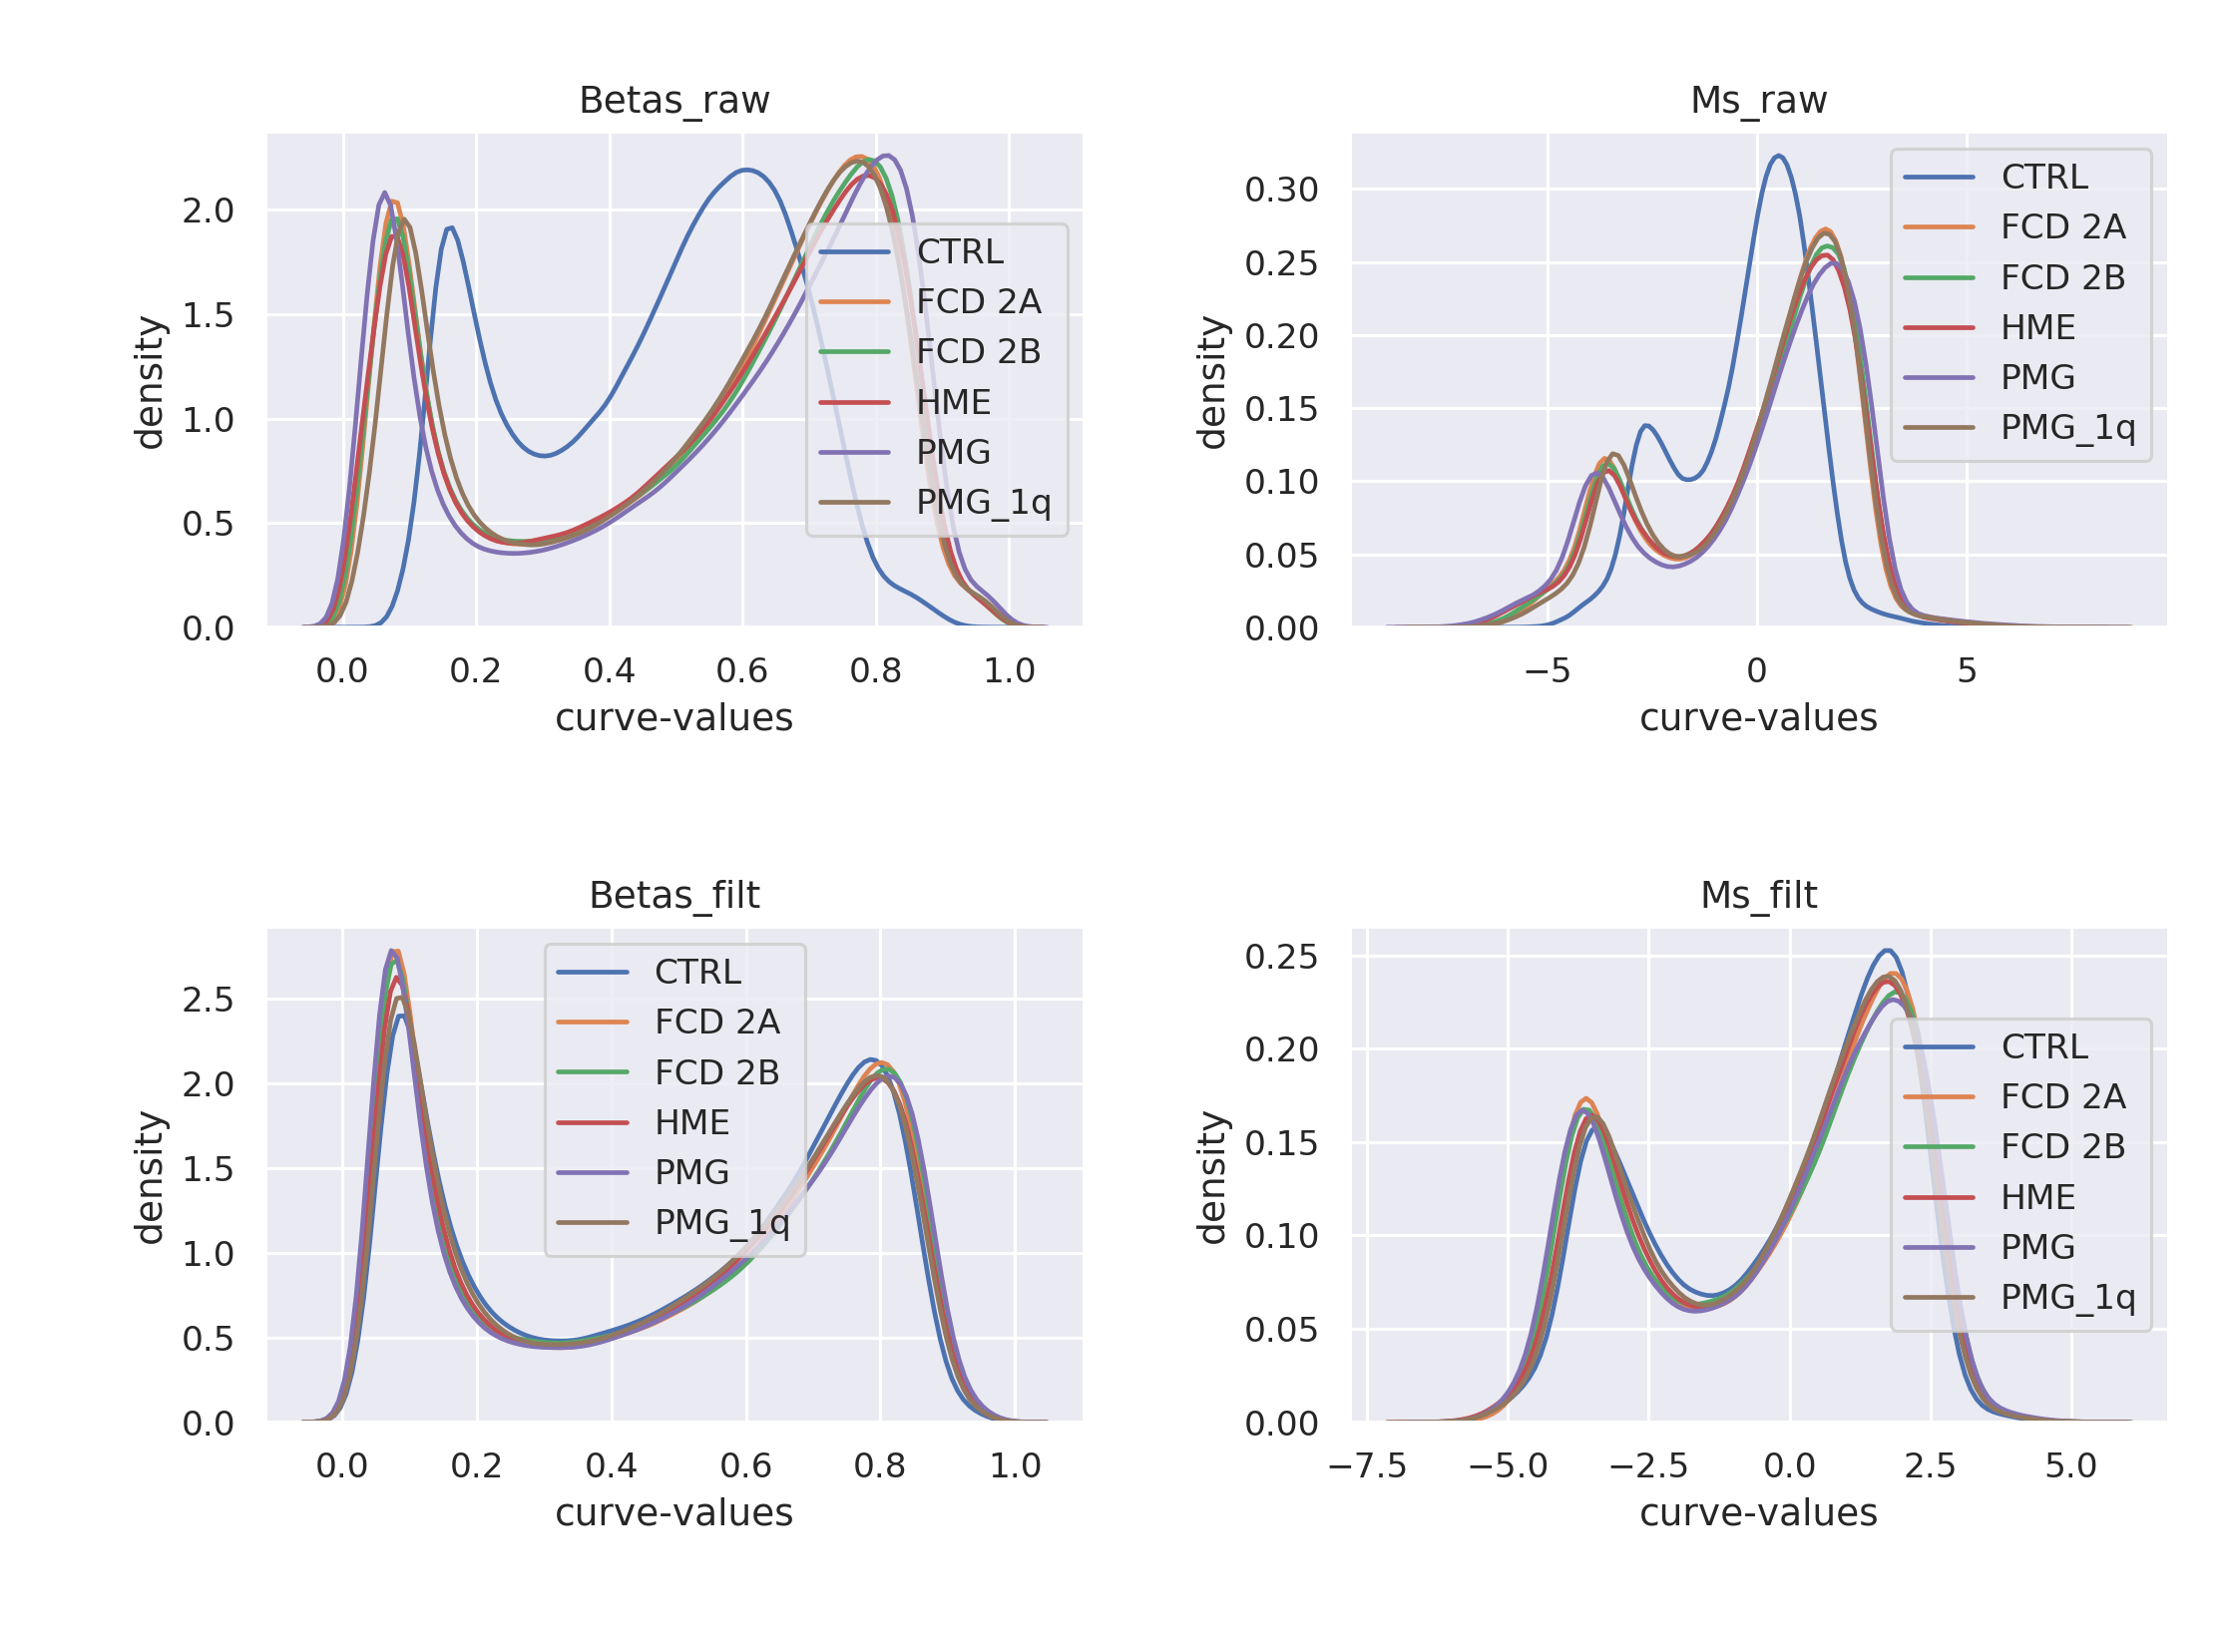

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [59]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


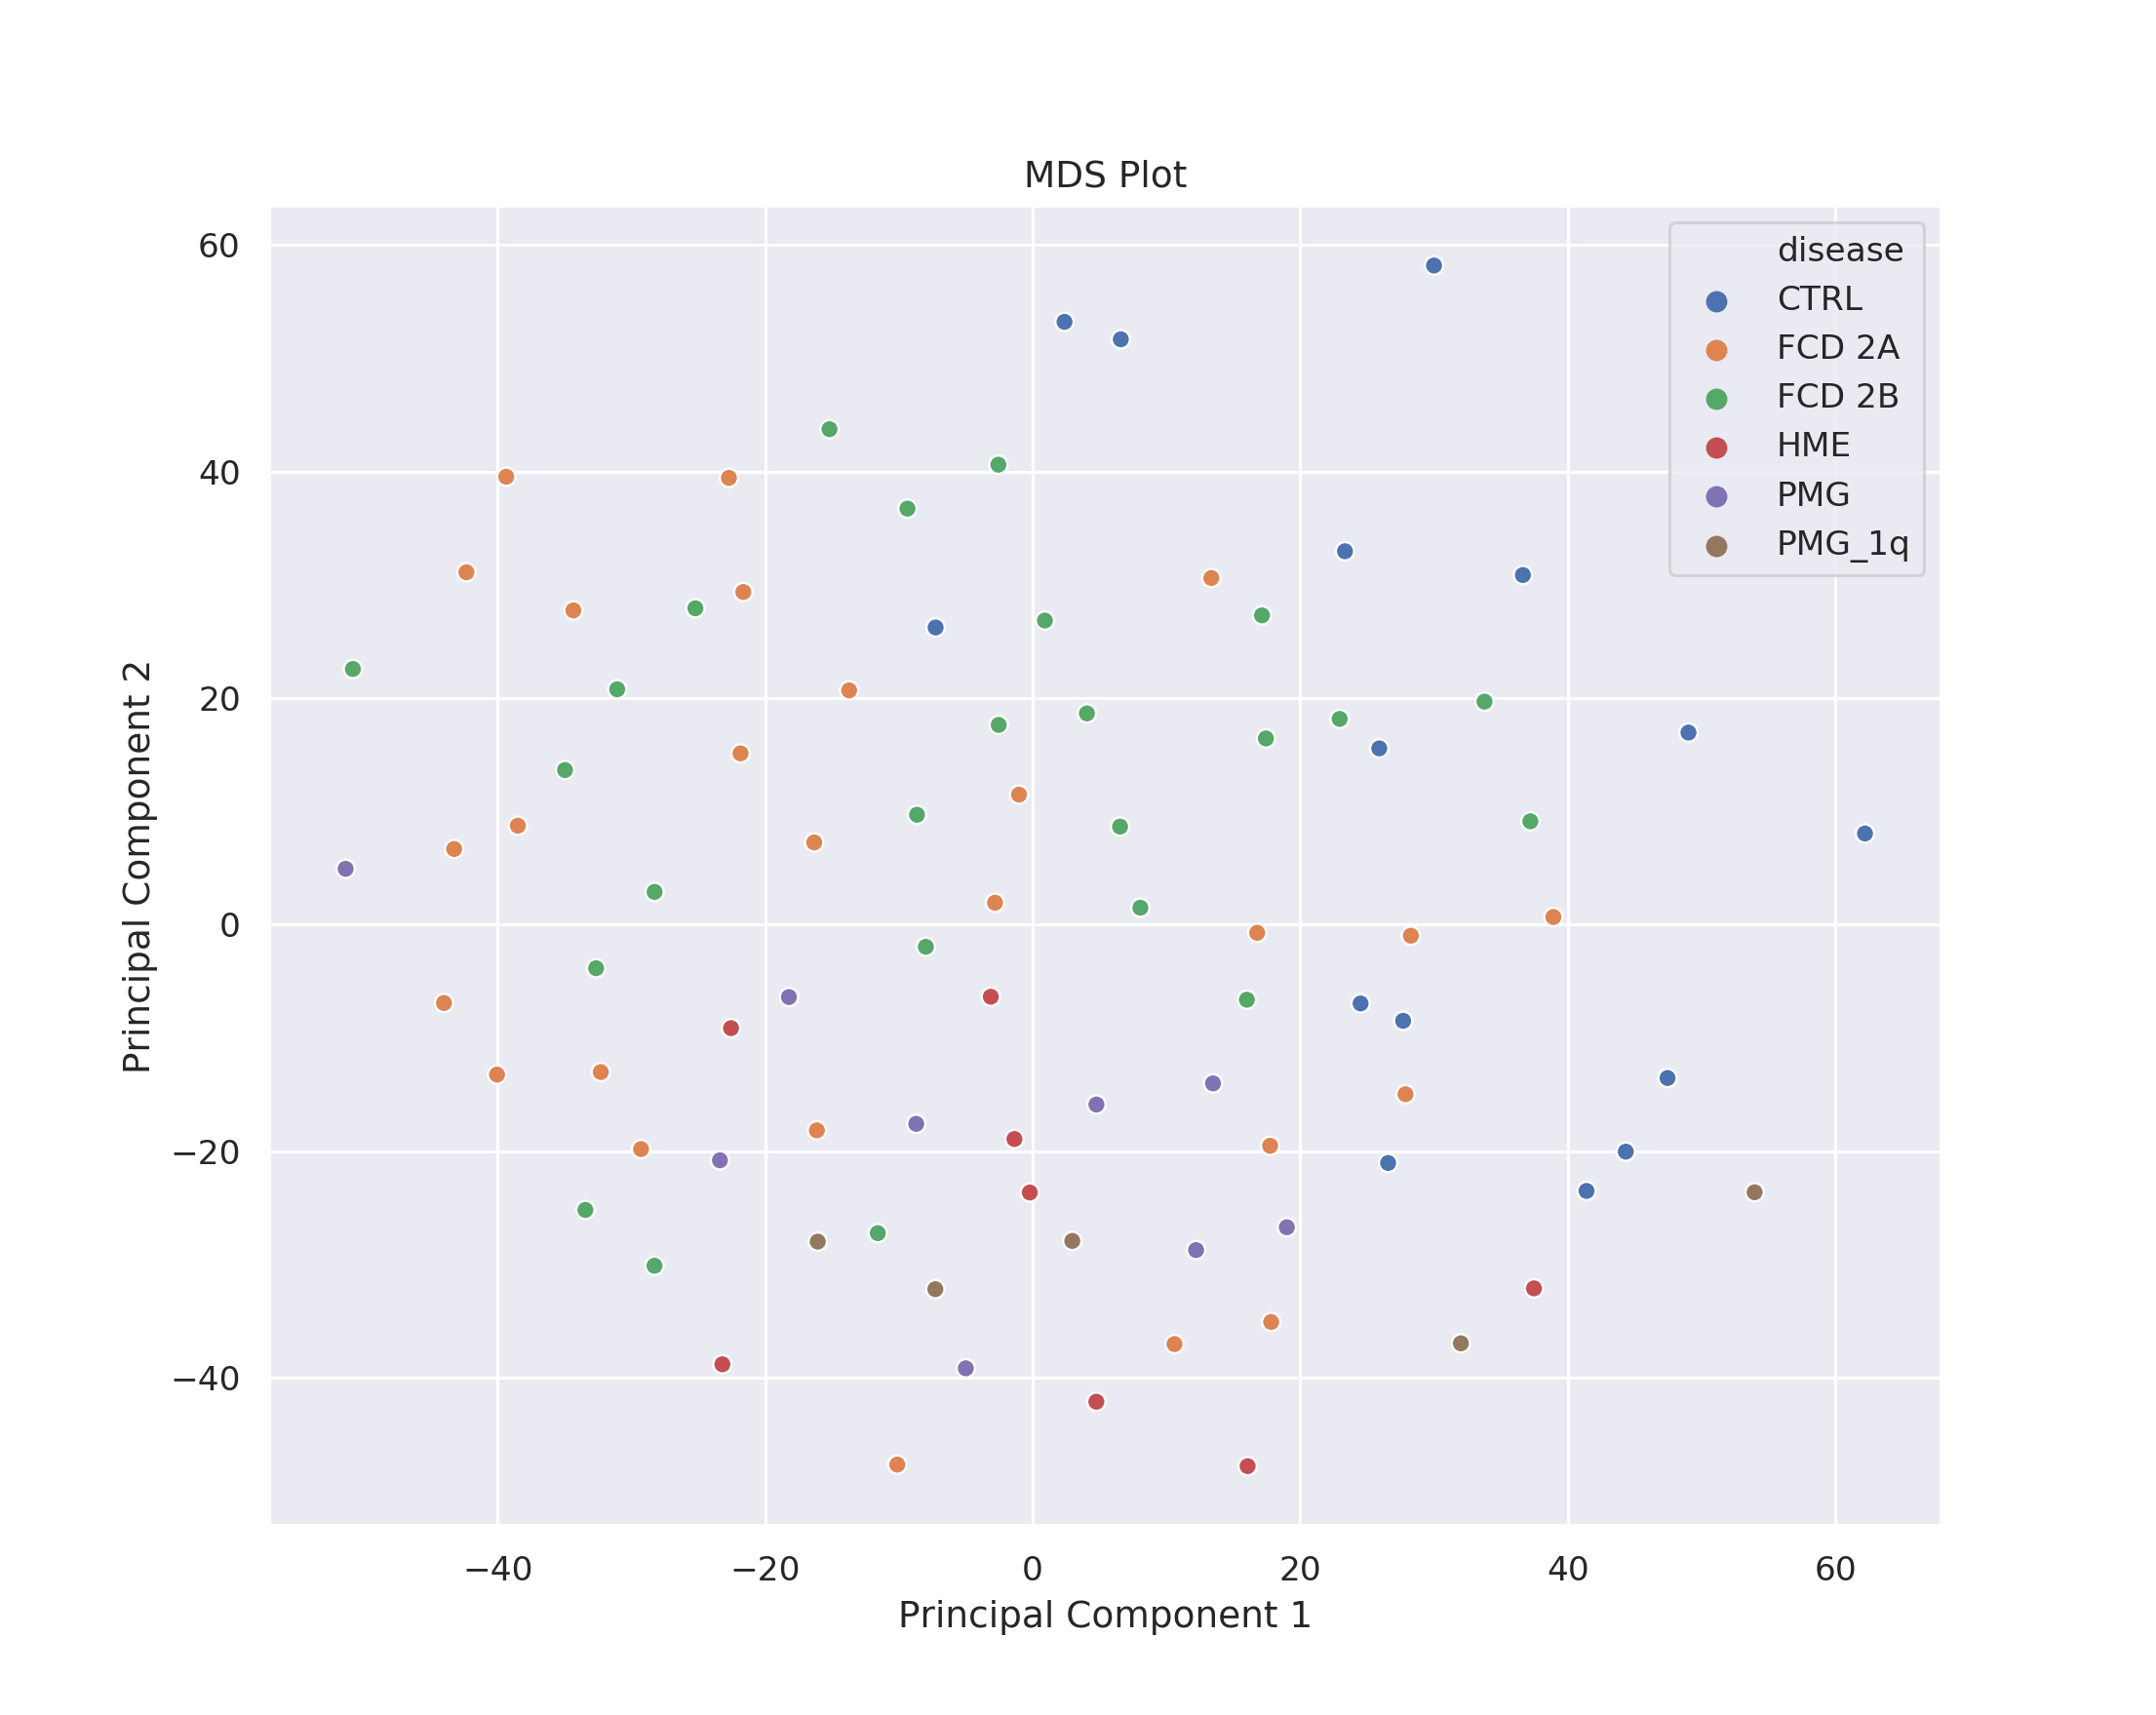

In [60]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


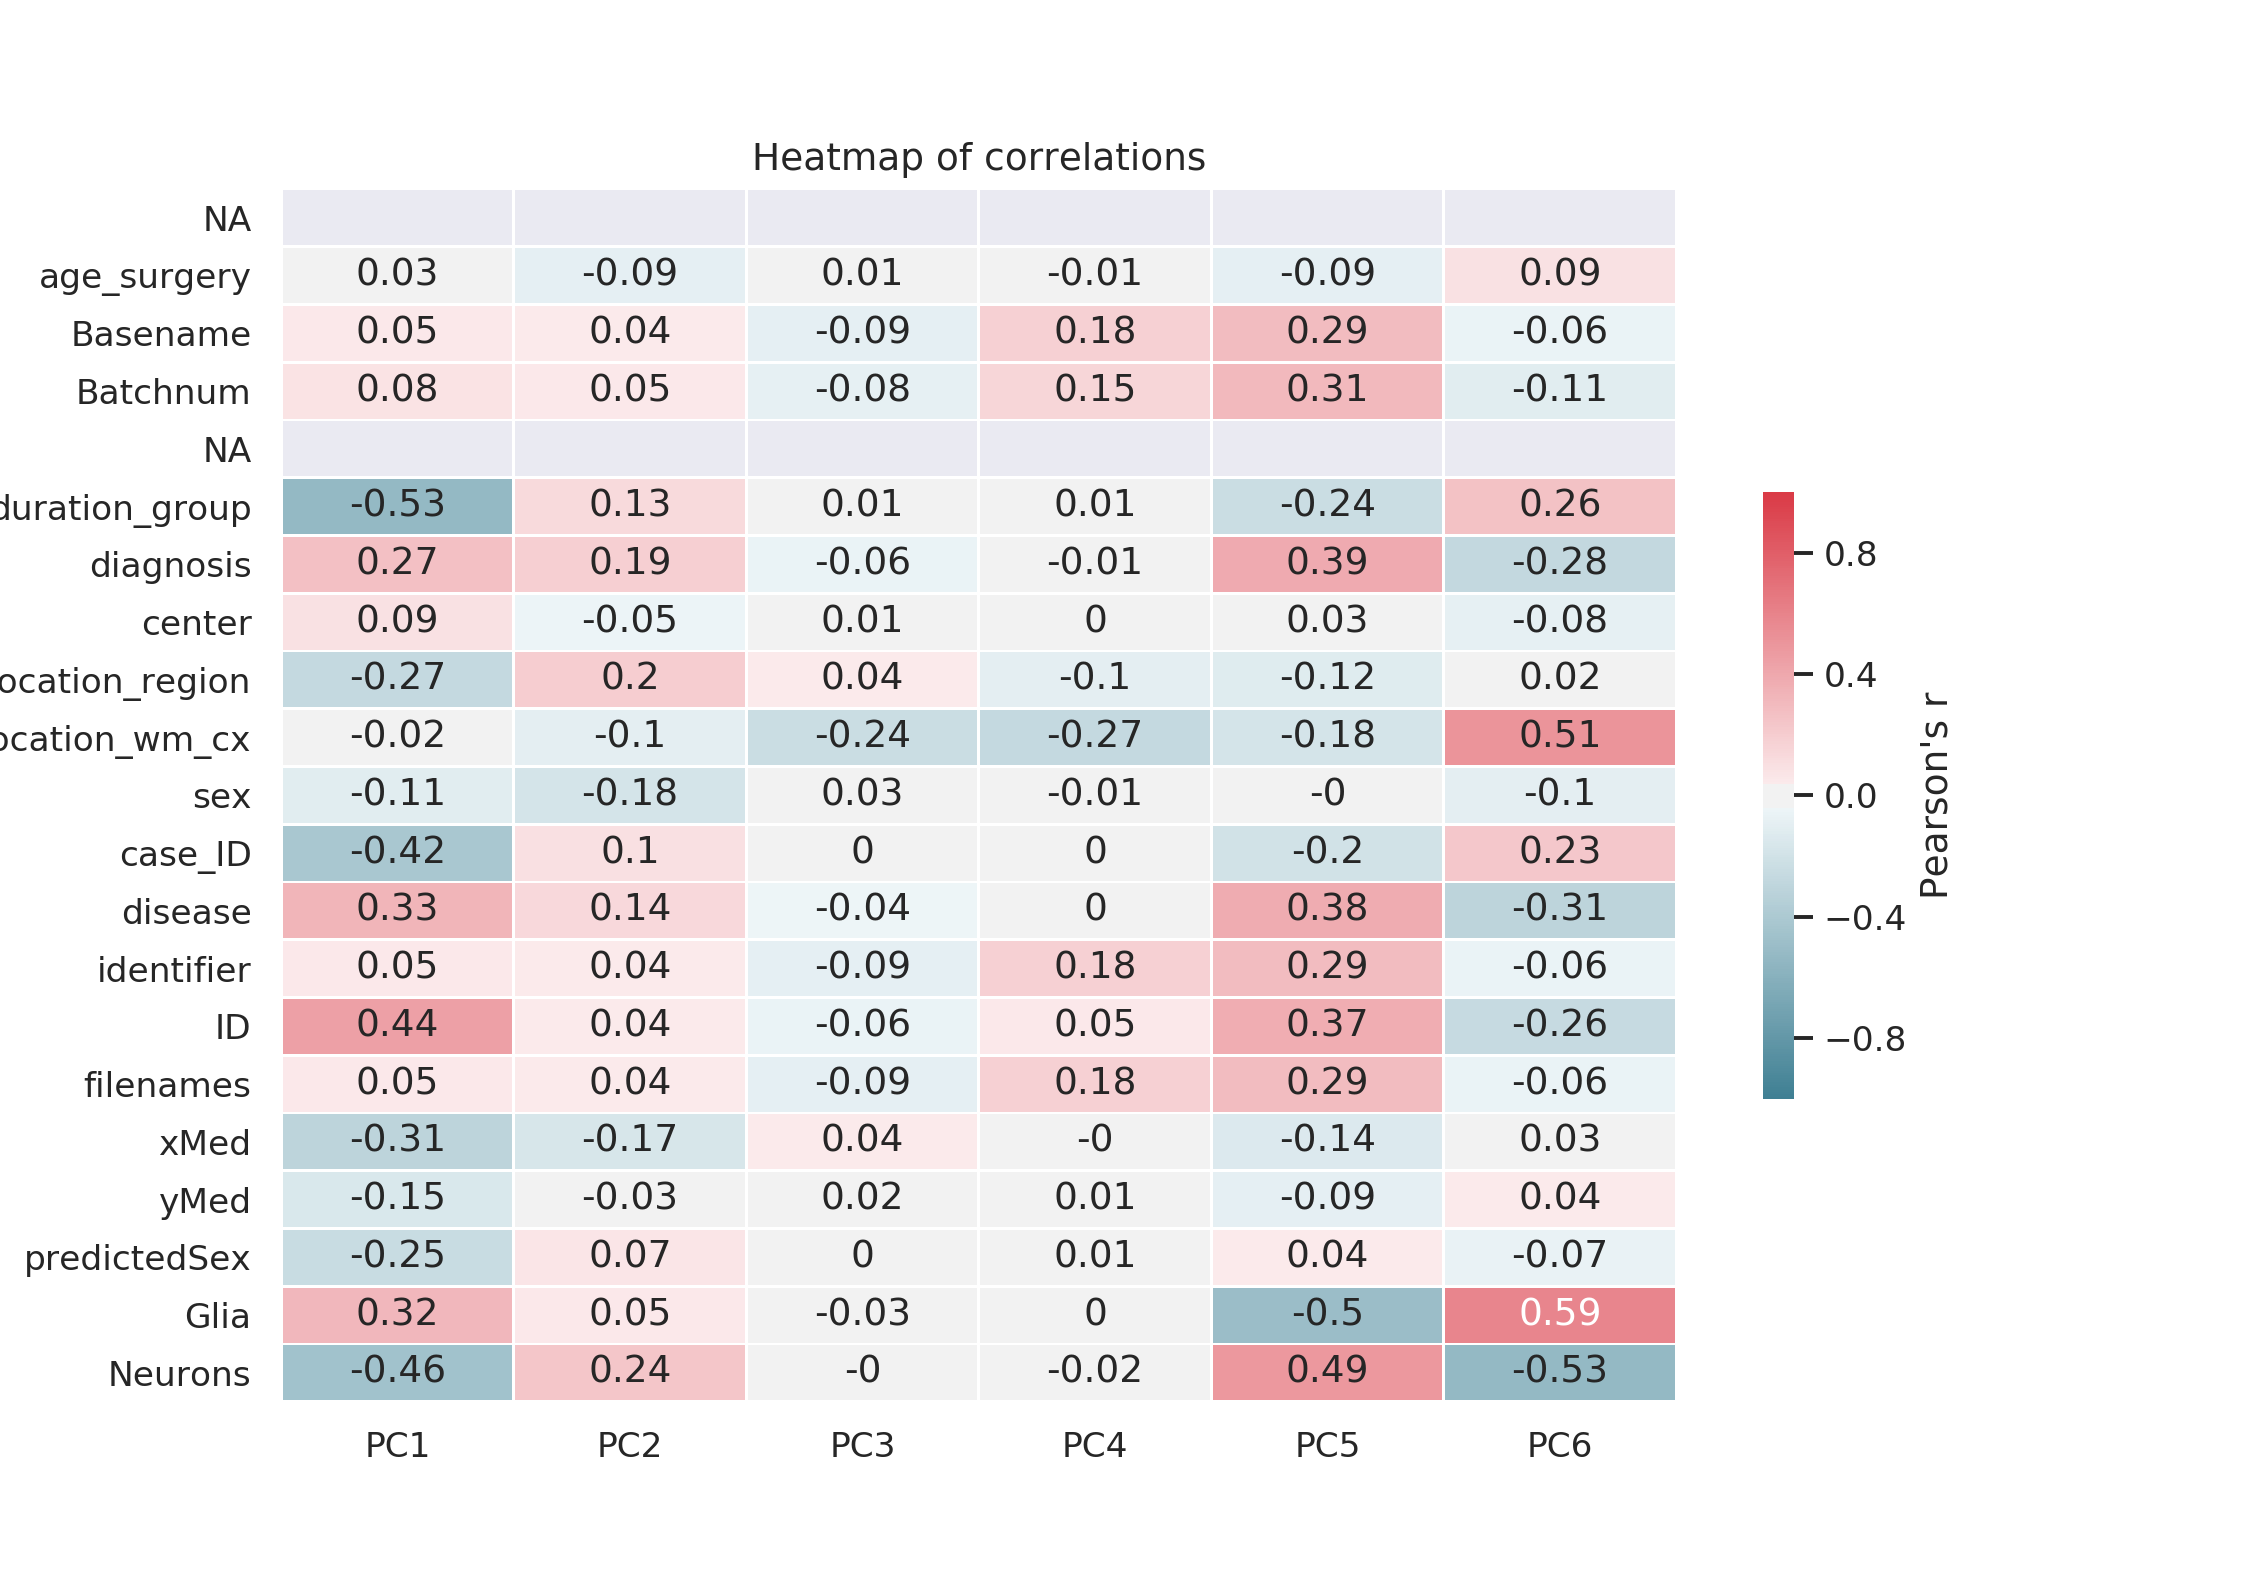

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [35]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [61]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['sex', 'location_wm_cx'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      sva=True,
                      number=35, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'CTRL-FCD 2A', 2: 'CTRL-FCD 2B', 3: 'CTRL-HME', 4: 'CTRL-PMG', 5: 'CTRL-PMG_1q', 6: 'FCD 2A-FCD 2B', 7: 'FCD 2A-HME', 8: 'FCD 2A-PMG', 9: 'FCD 2A-PMG_1q', 10: 'FCD 2B-HME', 11: 'FCD 2B-PMG', 12: 'FCD 2B-PMG_1q', 13: 'HME-PMG', 14: 'HME-PMG_1q', 15: 'PMG-PMG_1q'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You have chosen to include surrogate variable analysis
You are adjusting for these variables: []
You are correcting for these variables: []
creating model for SVA
Number of significant surrogate variables is:  1 

Iteration (out of 5 ):
1  
2  
3  
4  
5  
~0 + disease

<environment: 0x558a1e7de998>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation
Computing contrasts for experiment
done


In [62]:
preproidat.dectest

diseaseCTRL-diseaseFCD.2A  diseaseCTRL-diseaseFCD.2B  \
Down                        692.0                     1726.0   
NotSig                   432247.0                   428507.0   
Up                          931.0                     3637.0   

        diseaseCTRL-diseaseHME  diseaseCTRL-diseasePMG  \
Down                    6547.0                  7885.0   
NotSig                423434.0                420764.0   
Up                      3889.0                  5221.0   

        diseaseCTRL-diseasePMG_1q  diseaseFCD.2A-diseaseFCD.2B  \
Down                       2641.0                          1.0   
NotSig                   429597.0                     433852.0   
Up                         1632.0                         17.0   

        diseaseFCD.2A-diseaseHME  diseaseFCD.2A-diseasePMG  \
Down                        16.0                      64.0   
NotSig                  433822.0                  433745.0   
Up                          32.0                      61.0   

        diseaseFCD.2A-diseasePMG_1q  diseaseFCD.2B-diseaseHME  \
Down                           70.0                     546.0   
NotSig                     433747.0                  432959.0   
Up                             53.0                     365.0   

        diseaseFCD.2B-diseasePMG  diseaseFCD.2B-diseasePMG_1q  \
Down                      2378.0                        469.0   
NotSig                  429070.0                     432951.0   
Up                        2422.0                        450.0   

        diseaseHME-diseasePMG  diseaseHME-diseasePMG_1q  \
Down                      0.0                      22.0   
NotSig               433870.0                  433840.0   
Up                        0.0                       8.0   

        diseasePMG-diseasePMG_1q  
Down                        34.0  
NotSig                  433824.0  
Up                          12.0

In [63]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg17824939                 -0.220858                  0.105772   
cg13981804                  0.222555                  0.372407   
cg01143375                  0.704703                  0.369527   
cg26808779                  0.797332                  0.463158   
cg17130063                 -2.659615                 -0.864921   
...                              ...                       ...   
cg27079680                 -3.580667                 -3.177351   
cg12016107                 -1.719115                 -3.051037   
cg20513730                  1.173397                  0.411700   
cg22732672                 -5.013546                 -3.973265   
cg10583382                 -3.985009                 -2.441487   

            CTRL.202818860053_R06C01  CTRL.202818860053_R08C01  \
cg17824939                 -0.671630                 -0.571496   
cg13981804                  0.345740                  0.719029   
cg01143375                  0.463990                  1.025966   
cg26808779                  0.790718                  0.523322   
cg17130063                 -2.487289                 -3.100818   
...                              ...                       ...   
cg27079680                 -3.430000                 -4.621137   
cg12016107                 -1.663960                 -1.767309   
cg20513730                  1.368134                  1.076636   
cg22732672                 -4.422941                 -4.158137   
cg10583382                 -3.038867                 -2.929354   

            CTRL.202931510124_R01C01  CTRL.202931510124_R04C01  \
cg17824939                 -0.393315                  0.340507   
cg13981804                  0.422485                  0.497222   
cg01143375                  0.696363                  1.462836   
cg26808779                  1.184770                  1.738096   
cg17130063                 -2.315868                 -2.782275   
...                              ...                       ...   
cg27079680                 -2.746026                 -4.362150   
cg12016107                 -1.814573                 -2.019493   
cg20513730                  0.899582                  1.501854   
cg22732672                 -3.462273                 -4.386166   
cg10583382                 -3.738210                 -4.382611   

            CTRL.202931510124_R05C01  CTRL.202931510124_R06C01  \
cg17824939                 -0.039065                 -0.041930   
cg13981804                  1.025568                  0.840832   
cg01143375                  1.204469                  1.726702   
cg26808779                  1.273932                  1.462331   
cg17130063                 -2.690008                 -3.252170   
...                              ...                       ...   
cg27079680                 -3.964174                 -3.114139   
cg12016107                 -1.716015                 -2.517987   
cg20513730                  1.171271                  0.899684   
cg22732672                 -4.627583                 -3.938017   
cg10583382                 -4.015893                 -3.582913   

            CTRL.202931510124_R07C01  CTRL.202931510124_R08C01  ...  \
cg17824939                  0.107002                 -0.734897  ...   
cg13981804                  1.302394                  0.712586  ...   
cg01143375                  2.018916                  1.564671  ...   
cg26808779                  2.054442                  1.454115  ...   
cg17130063                 -3.551085                 -3.112941  ...   
...                              ...                       ...  ...   
cg27079680                 -3.257328                 -2.975364  ...   
cg12016107                 -2.303170                 -2.305064  ...   
cg20513730                  1.227330                  1.381382  ...   
cg22732672                 -3.178207                 -4.529583  ...   
cg10583382                 -3.476304                 -3.489

In [64]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg17824939                  0.461803                  0.518321   
cg13981804                  0.538490                  0.564177   
cg01143375                  0.619744                  0.563686   
cg26808779                  0.634754                  0.579577   
cg17130063                  0.136637                  0.354454   
...                              ...                       ...   
cg27079680                  0.077135                  0.099538   
cg12016107                  0.234948                  0.107665   
cg20513730                  0.692820                  0.570862   
cg22732672                  0.030028                  0.059858   
cg10583382                  0.059401                  0.166143   

            CTRL.202818860053_R06C01  CTRL.202818860053_R08C01  \
cg17824939                  0.385673                  0.402242   
cg13981804                  0.559627                  0.622082   
cg01143375                  0.579717                  0.670654   
cg26808779                  0.633691                  0.589703   
cg17130063                  0.151349                  0.104395   
...                              ...                       ...   
cg27079680                  0.084905                  0.039048   
cg12016107                  0.241689                  0.232913   
cg20513730                  0.720777                  0.678365   
cg22732672                  0.044542                  0.053040   
cg10583382                  0.108478                  0.116040   

            CTRL.202931510124_R01C01  CTRL.202931510124_R04C01  \
cg17824939                  0.432263                  0.558733   
cg13981804                  0.572692                  0.585319   
cg01143375                  0.618381                  0.733794   
cg26808779                  0.694495                  0.769370   
cg17130063                  0.167251                  0.126914   
...                              ...                       ...   
cg27079680                  0.129724                  0.046370   
cg12016107                  0.215546                  0.197847   
cg20513730                  0.651024                  0.739044   
cg22732672                  0.083183                  0.045640   
cg10583382                  0.069711                  0.045747   

            CTRL.202931510124_R05C01  CTRL.202931510124_R06C01  \
cg17824939                  0.493231                  0.492735   
cg13981804                  0.670593                  0.641716   
cg01143375                  0.697385                  0.767965   
cg26808779                  0.707448                  0.733726   
cg17130063                  0.134171                  0.094985   
...                              ...                       ...   
cg27079680                  0.060213                  0.103534   
cg12016107                  0.233357                  0.148636   
cg20513730                  0.692506                  0.651040   
cg22732672                  0.038881                  0.061248   
cg10583382                  0.058217                  0.077024   

            CTRL.202931510124_R07C01  CTRL.202931510124_R08C01  ...  \
cg17824939                  0.518534                  0.375336  ...   
cg13981804                  0.711515                  0.621031  ...   
cg01143375                  0.802090                  0.747354  ...   
cg26808779                  0.805969                  0.732612  ...   
cg17130063                  0.078607                  0.103611  ...   
...                              ...                       ...  ...   
cg27079680                  0.094678                  0.112809  ...   
cg12016107                  0.171073                  0.168297  ...   
cg20513730                  0.700718                  0.722621  ...   
cg22732672                  0.099485                  0.041500  ...   
cg10583382                  0.082444                  0.081

<IPython.core.display.Javascript object>


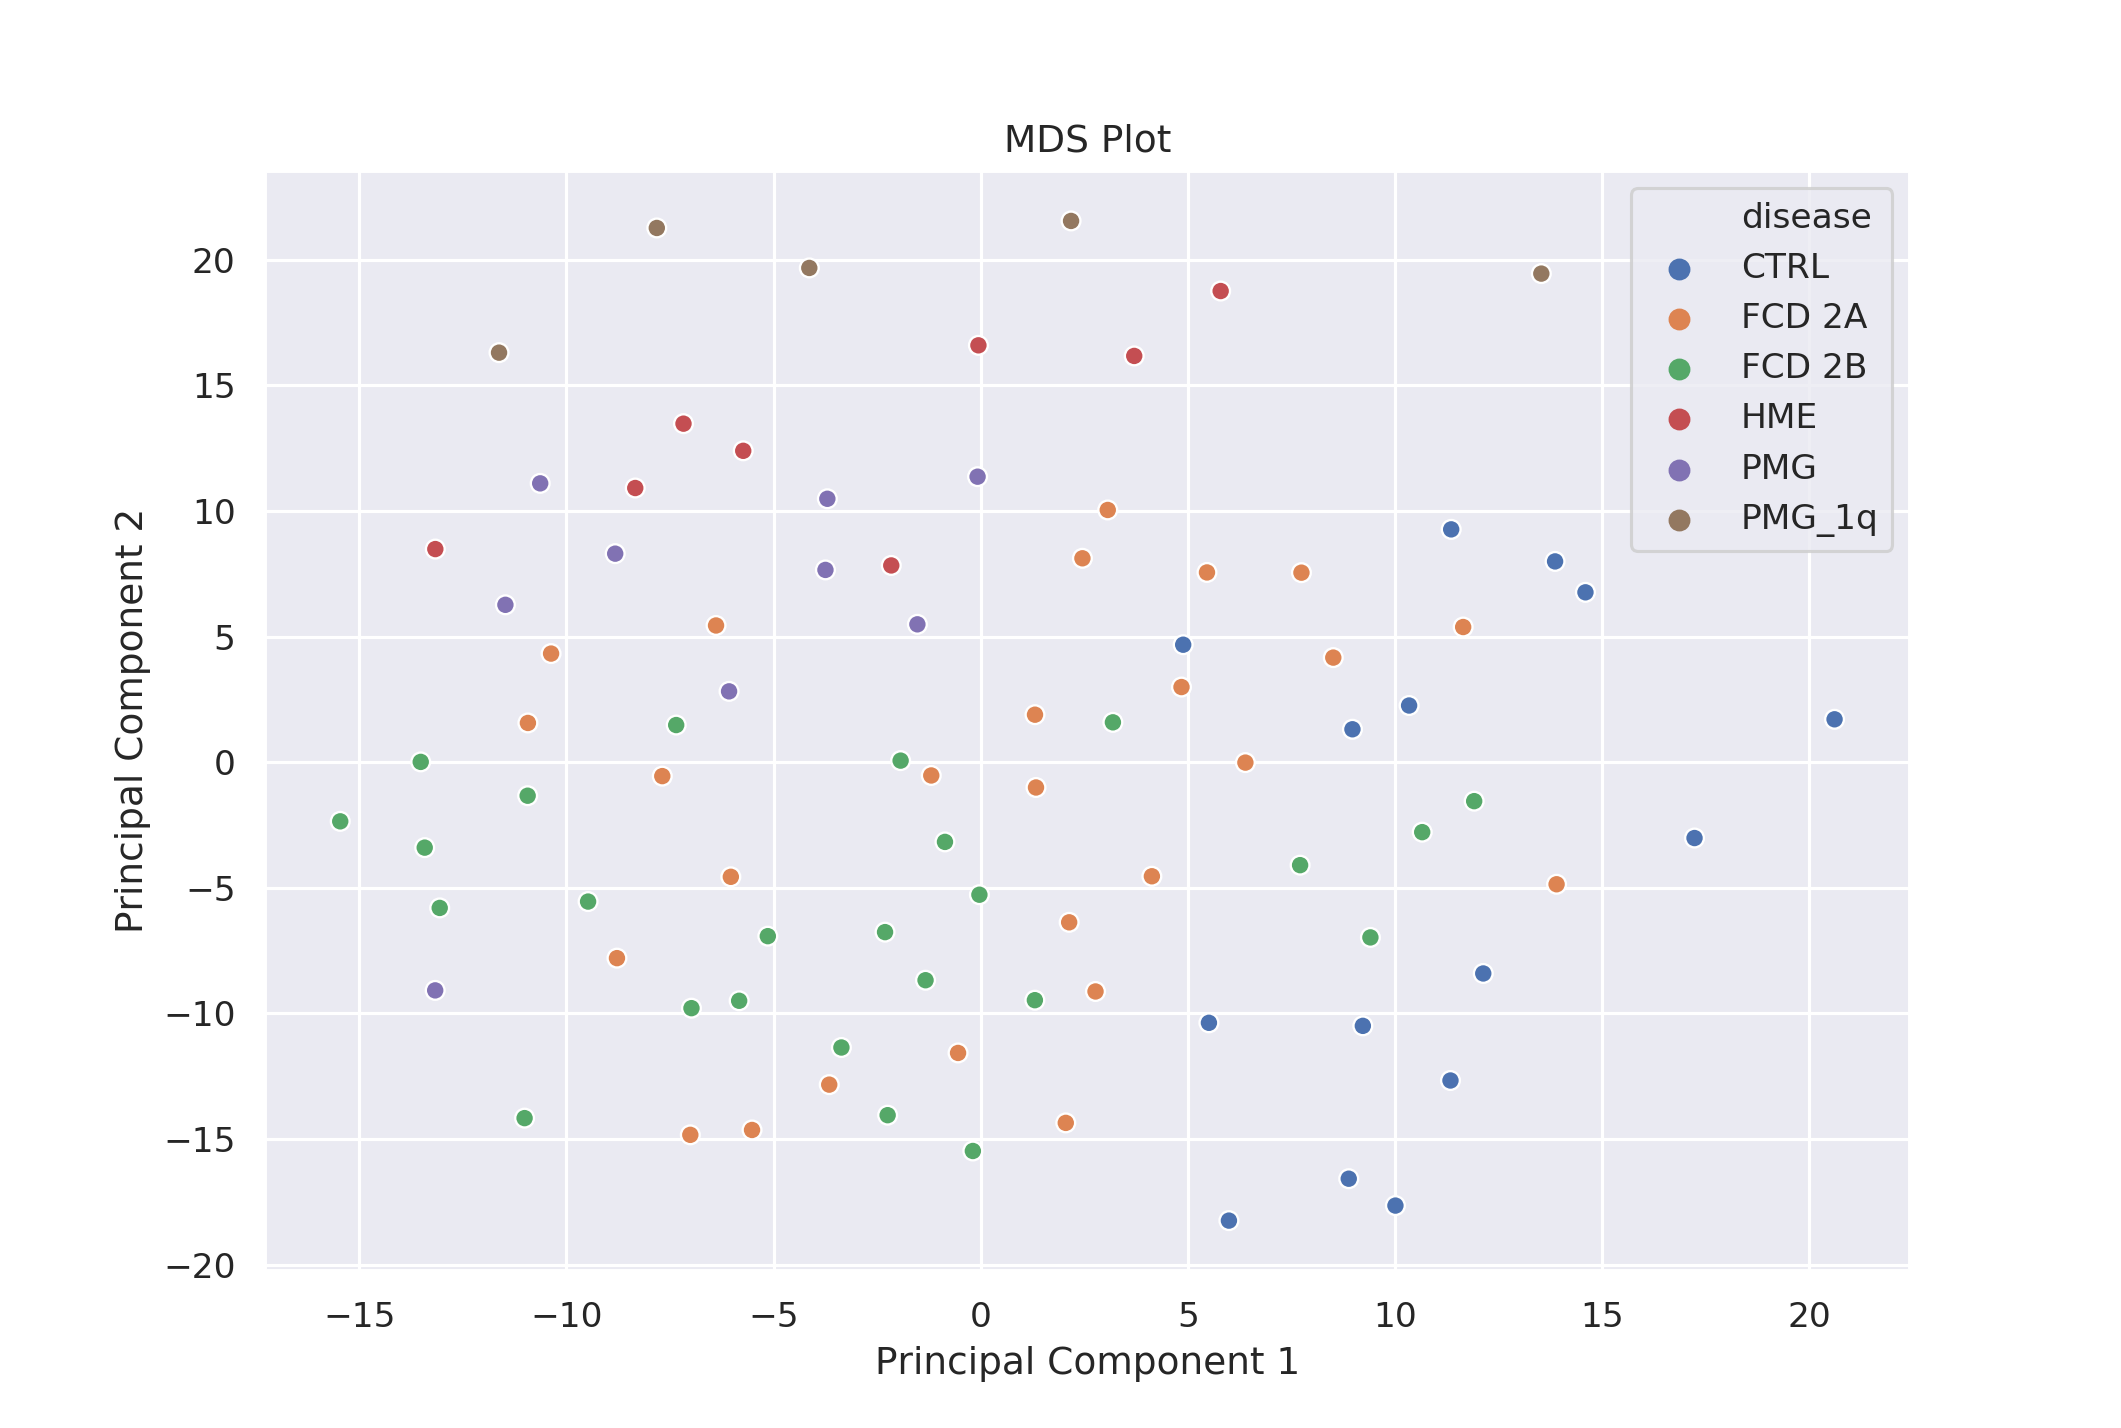

In [65]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, pheno_py, n_components=2, group='disease', components=(0,1)) 

In [66]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.1707015037536621 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [67]:
embedding.shape

(88, 2)

In [68]:
pheno_py[group].unique()

array(['CTRL', 'FCD 2A', 'FCD 2B', 'HME', 'PMG', 'PMG_1q'], dtype=object)

<IPython.core.display.Javascript object>


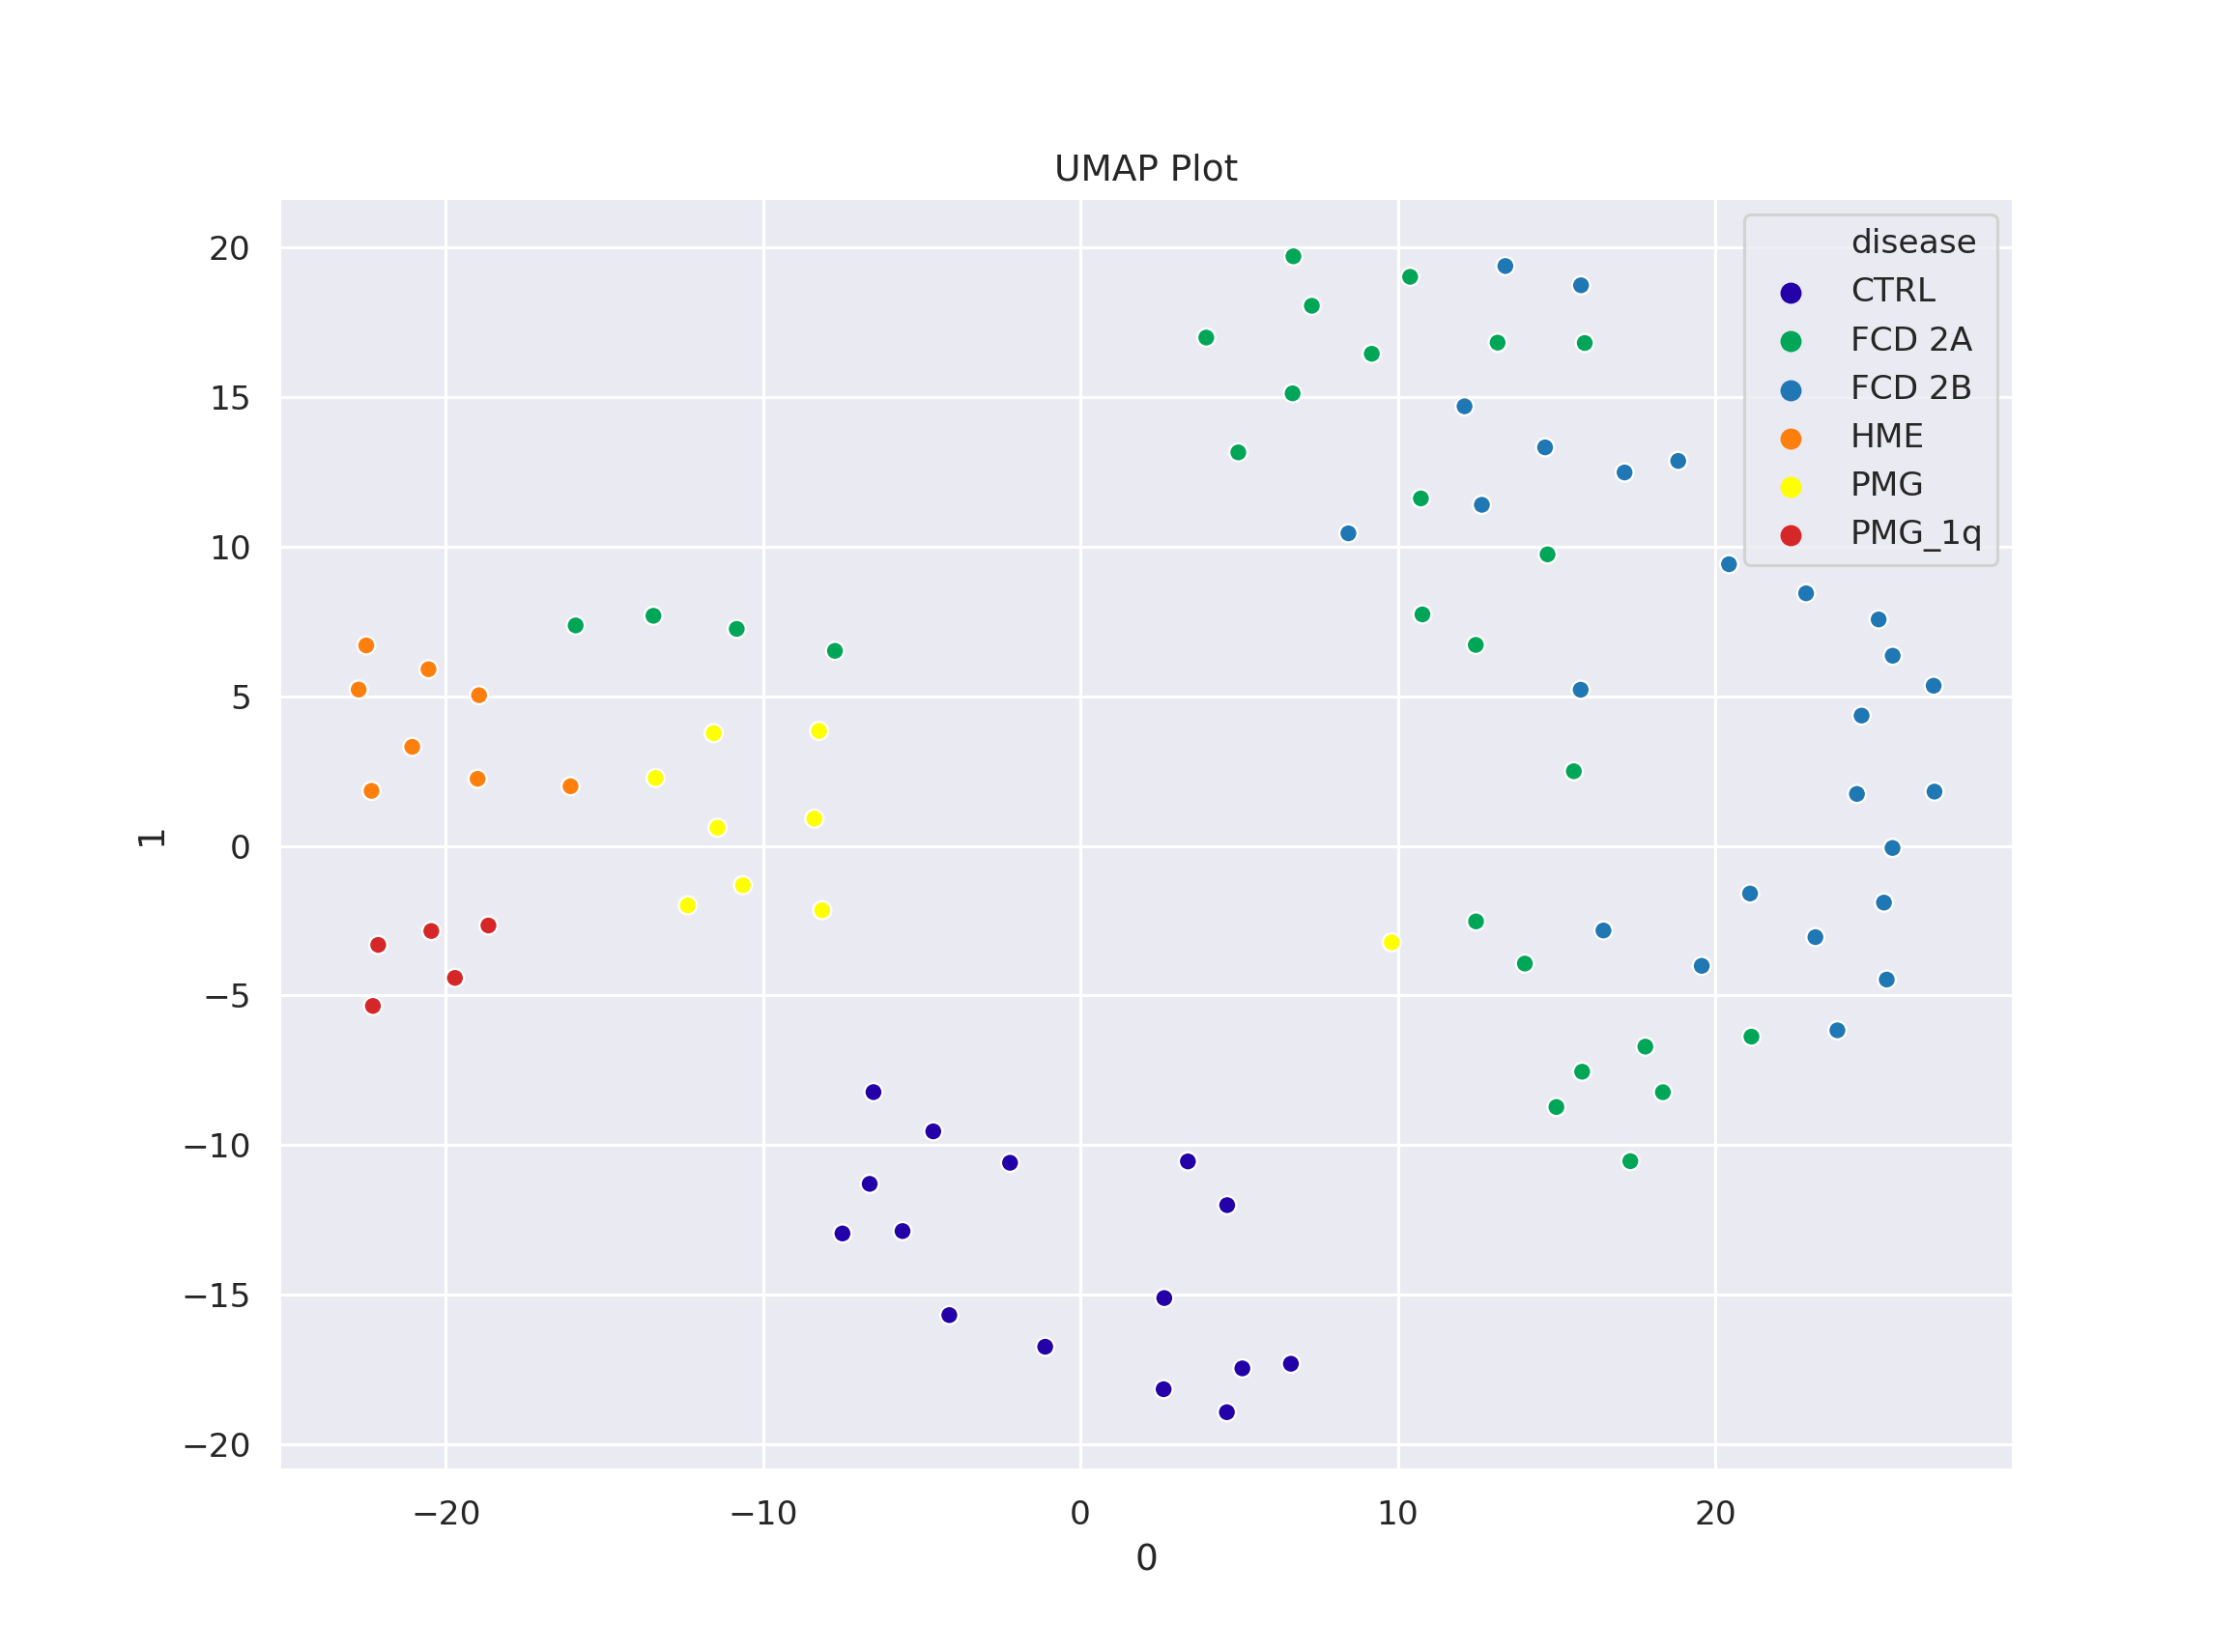

In [69]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

### Champ Pipeline

In [227]:
beta_py,mval_py, pheno_py=preproidat.champ_processing(pheno=preproidat.pheno_orig, GRset=grset, RGset=preproidat.RGset_orig, 
                                                      beta=None, M=None, 
                                                      autoimpute=True, filterDetP=True, ProbeCutoff=0, SampleCutoff=0.1,
                                                      filterBeads=True,beadCutoff=1,fixOutlier = True, dropSnPs=True, 
                                                      filterXY=True, filterNoCG=True, excludeXreactiveprobes=True, array_type='EPIC', verbose=True,
                                                      badSampleCutoff=10,rm_badsamples=True,detPFilter=False, detPcut=0.01, addQC=False, 
                                                      imputation_method="imputePCA"
                                                      )


Now performing badsample removal
Found and removed 2 bad samples

Now removing more bad probes 
Dropping cross- reactive probes


/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
951
 
 probes from the analysis.

 In total there were 
 
865859
 
 probes for the analysis before filtering.


 
402128
 
 probes have been removed from further analysis.

 In total there are
 
463731
 
 probes left for the analysis.

Now performing champ_filter function
[===========================]
<<<FILTER START>>> 
-----------------------------
 Section 1:  Check Input Start 
  You have inputed 
 
beta,M
 
 for Analysis.
 pd file provided, checking if it's in accord with Data Matrix...
    pd file check success.
  Parameter filterDetP is TRUE, checking if detP in accord with Data Matrix...
    !!! Your detP matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  Parameter filterBeads is TRUE, checking if beadcount in accord with Data Matrix...
    !!! Your  beadcount matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  parame

In [31]:
preproidat.pheno#=pandas2ri.py2ri(preproidat.pheno_py)

R object with classes: ('DataFrame',) mapped to:
<RS4 - Python:0x7f4aee71bd48 / R:0x55ee100c4920>

In [228]:
preproidat.pheno_py

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          6.0  /home/D

In [229]:
preproidat.beta_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                    0.156923                    0.422315   
cg16535257                    0.238335                    0.169370   
cg06325811                    0.478600                    0.593693   
cg16619049                    0.229611                    0.310454   
cg18147296                    0.794871                    0.761840   
...                                ...                         ...   
cg27236246                    0.707283                    0.588184   
cg05615487                    0.810684                    0.793200   
cg22122449                    0.840274                    0.799708   
cg08423507                    0.801299                    0.767194   
cg19565306                    0.054774                    0.024667   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                    0.138946                    0.105289   
cg16535257                    0.221738                    0.183341   
cg06325811                    0.482502                    0.465105   
cg16619049                    0.298304                    0.312625   
cg18147296                    0.739049                    0.733477   
...                                ...                         ...   
cg27236246                    0.669365                    0.668608   
cg05615487                    0.819091                    0.805608   
cg22122449                    0.799685                    0.839762   
cg08423507                    0.791393                    0.833585   
cg19565306                    0.055600                    0.068628   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                    0.166462                    0.149487   
cg16535257                    0.165361                    0.173431   
cg06325811                    0.582051                    0.463323   
cg16619049                    0.219149                    0.136930   
cg18147296                    0.804378                    0.750398   
...                                ...                         ...   
cg27236246                    0.642855                    0.721008   
cg05615487                    0.681758                    0.856475   
cg22122449                    0.811784                    0.785157   
cg08423507                    0.758596                    0.824727   
cg19565306                    0.040871                    0.025904   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                    0.161774                    0.144102   
cg16535257                    0.161027                    0.087939   
cg06325811                    0.618723                    0.453706   
cg16619049                    0.233954                    0.259490   
cg18147296                    0.769173                    0.791540   
...                                ...                         ...   
cg27236246                    0.643210                    0.746420   
cg05615487                    0.621162                    0.830387   
cg22122449                    0.808449                    0.852215   
cg08423507                    0.749548                    0.851625   
cg19565306                    0.047212                    0.053306   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                    0.144201                    0.205977  ...   
cg16535257                    0.177919                    0.220226  ...   
cg06325811                    0.498835                    0.476062  ...   
cg16619049                    0.243354                    0.323805  ...   
cg18147296                    0.698707                    0.698555  ...   
...                                ...                         ...  ...   
cg27236246                    0.743181                    0.764571  ...   
cg05615487                    0.866029          

In [230]:
#without removal of cpgs
preproidat.mval_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                   -2.425602                   -0.451966   
cg16535257                   -1.676168                   -2.294030   
cg06325811                   -0.123569                    0.547148   
cg16619049                   -1.746392                   -1.151270   
cg18147296                    1.954186                    1.677555   
...                                ...                         ...   
cg27236246                    1.272781                    0.514266   
cg05615487                    2.098339                    1.939444   
cg22122449                    2.395259                    1.997369   
cg08423507                    2.011744                    1.720464   
cg19565306                   -4.109100                   -5.305217   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                   -2.631574                   -3.087066   
cg16535257                   -1.811399                   -2.155201   
cg06325811                   -0.101017                   -0.201699   
cg16619049                   -1.234062                   -1.136664   
cg18147296                    1.501894                    1.460490   
...                                ...                         ...   
cg27236246                    1.017556                    1.012621   
cg05615487                    2.178757                    2.051114   
cg22122449                    1.997163                    2.389764   
cg08423507                    1.923611                    2.324541   
cg19565306                   -4.086250                   -3.762488   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                   -2.324052                   -2.508316   
cg16535257                   -2.335536                   -2.252776   
cg06325811                    0.477819                   -0.212037   
cg16619049                   -1.833133                   -2.656042   
cg18147296                    2.039801                    1.588023   
...                                ...                         ...   
cg27236246                    0.847984                    1.369793   
cg05615487                    1.099134                    2.577111   
cg22122449                    2.108708                    1.869701   
cg08423507                    1.651879                    2.234310   
cg19565306                   -4.552587                   -5.232791   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                   -2.373356                   -2.570347   
cg16535257                   -2.381320                   -3.374557   
cg06325811                    0.698456                   -0.267918   
cg16619049                   -1.711209                   -1.512840   
cg18147296                    1.736497                    1.924891   
...                                ...                         ...   
cg27236246                    0.850215                    1.557546   
cg05615487                    0.713387                    2.291533   
cg22122449                    2.077427                    2.527717   
cg08423507                    1.581485                    2.520966   
cg19565306                   -4.334937                   -4.150532   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                   -2.569191                   -1.946695  ...   
cg16535257                   -2.208063                   -1.824075  ...   
cg06325811                   -0.006725                   -0.138246  ...   
cg16619049                   -1.636565                   -1.062311  ...   
cg18147296                    1.213520                    1.212480  ...   
...                                ...                         ...  ...   
cg27236246                    1.532964                    1.699355  ...   
cg05615487                    2.692489          

<IPython.core.display.Javascript object>


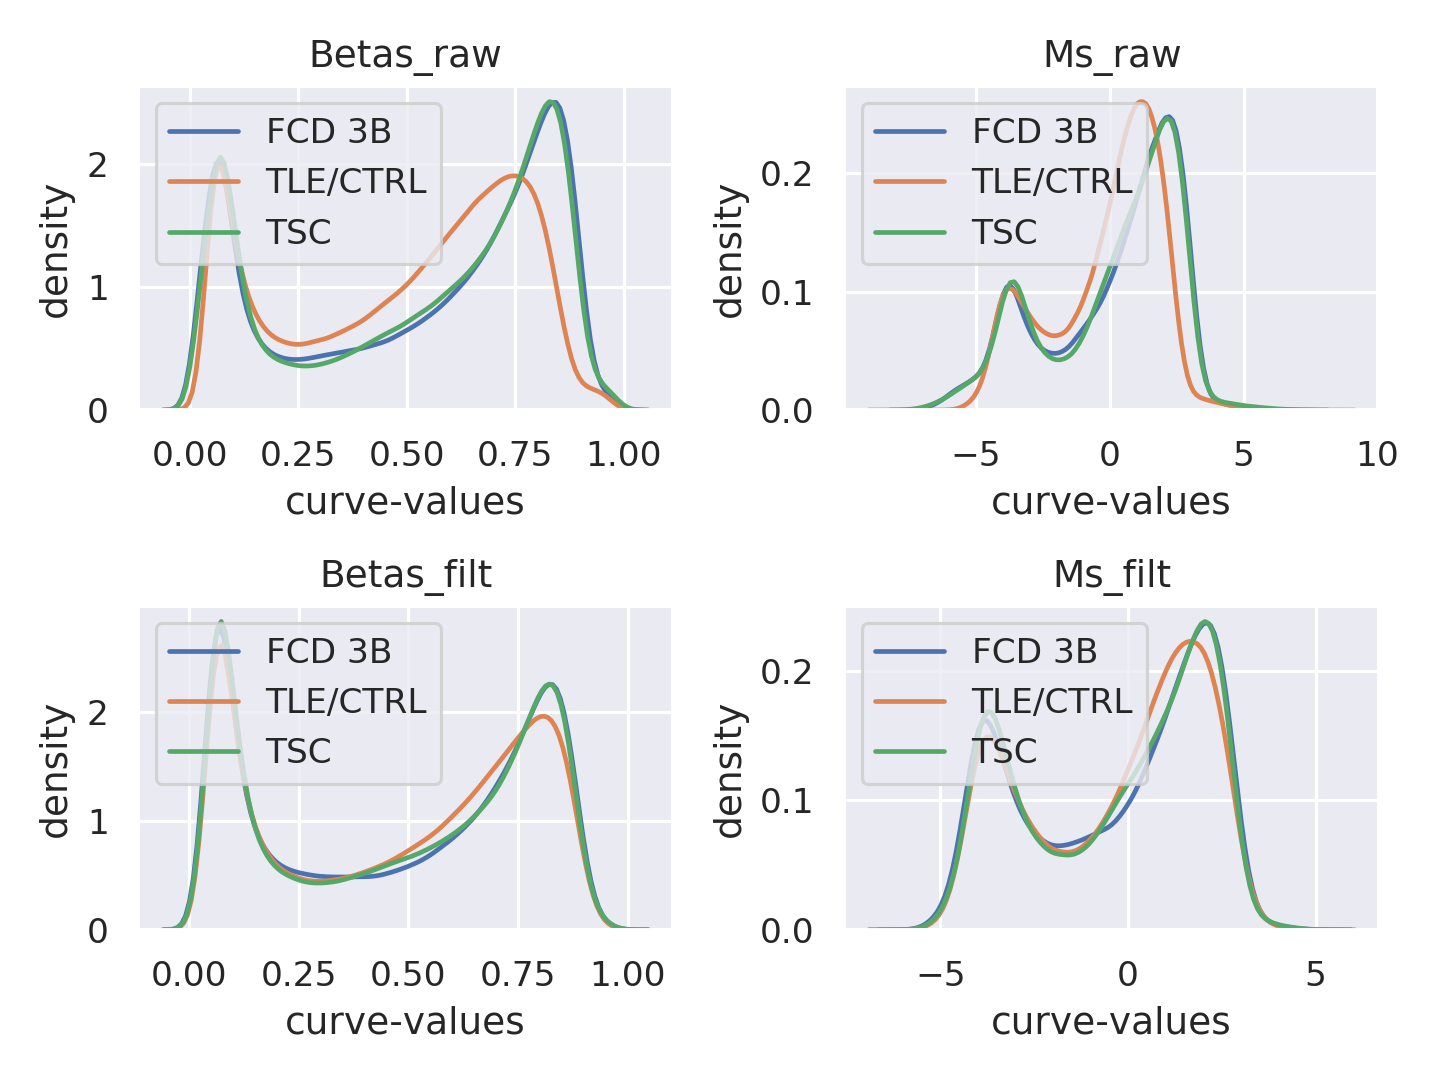

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [215]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


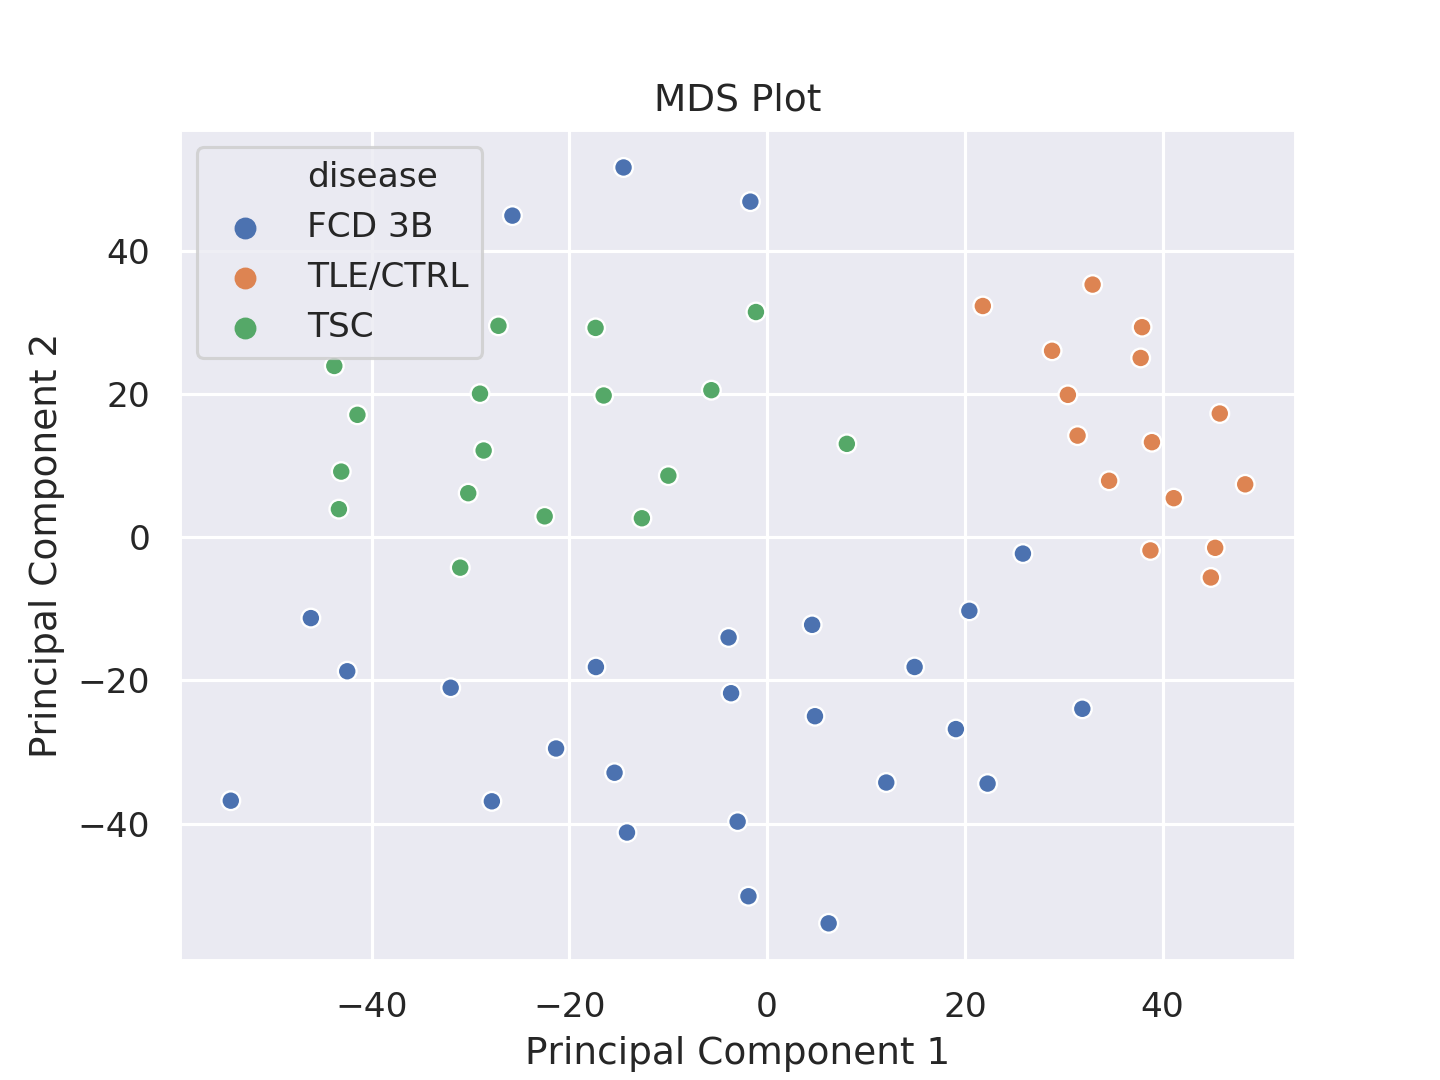

In [216]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


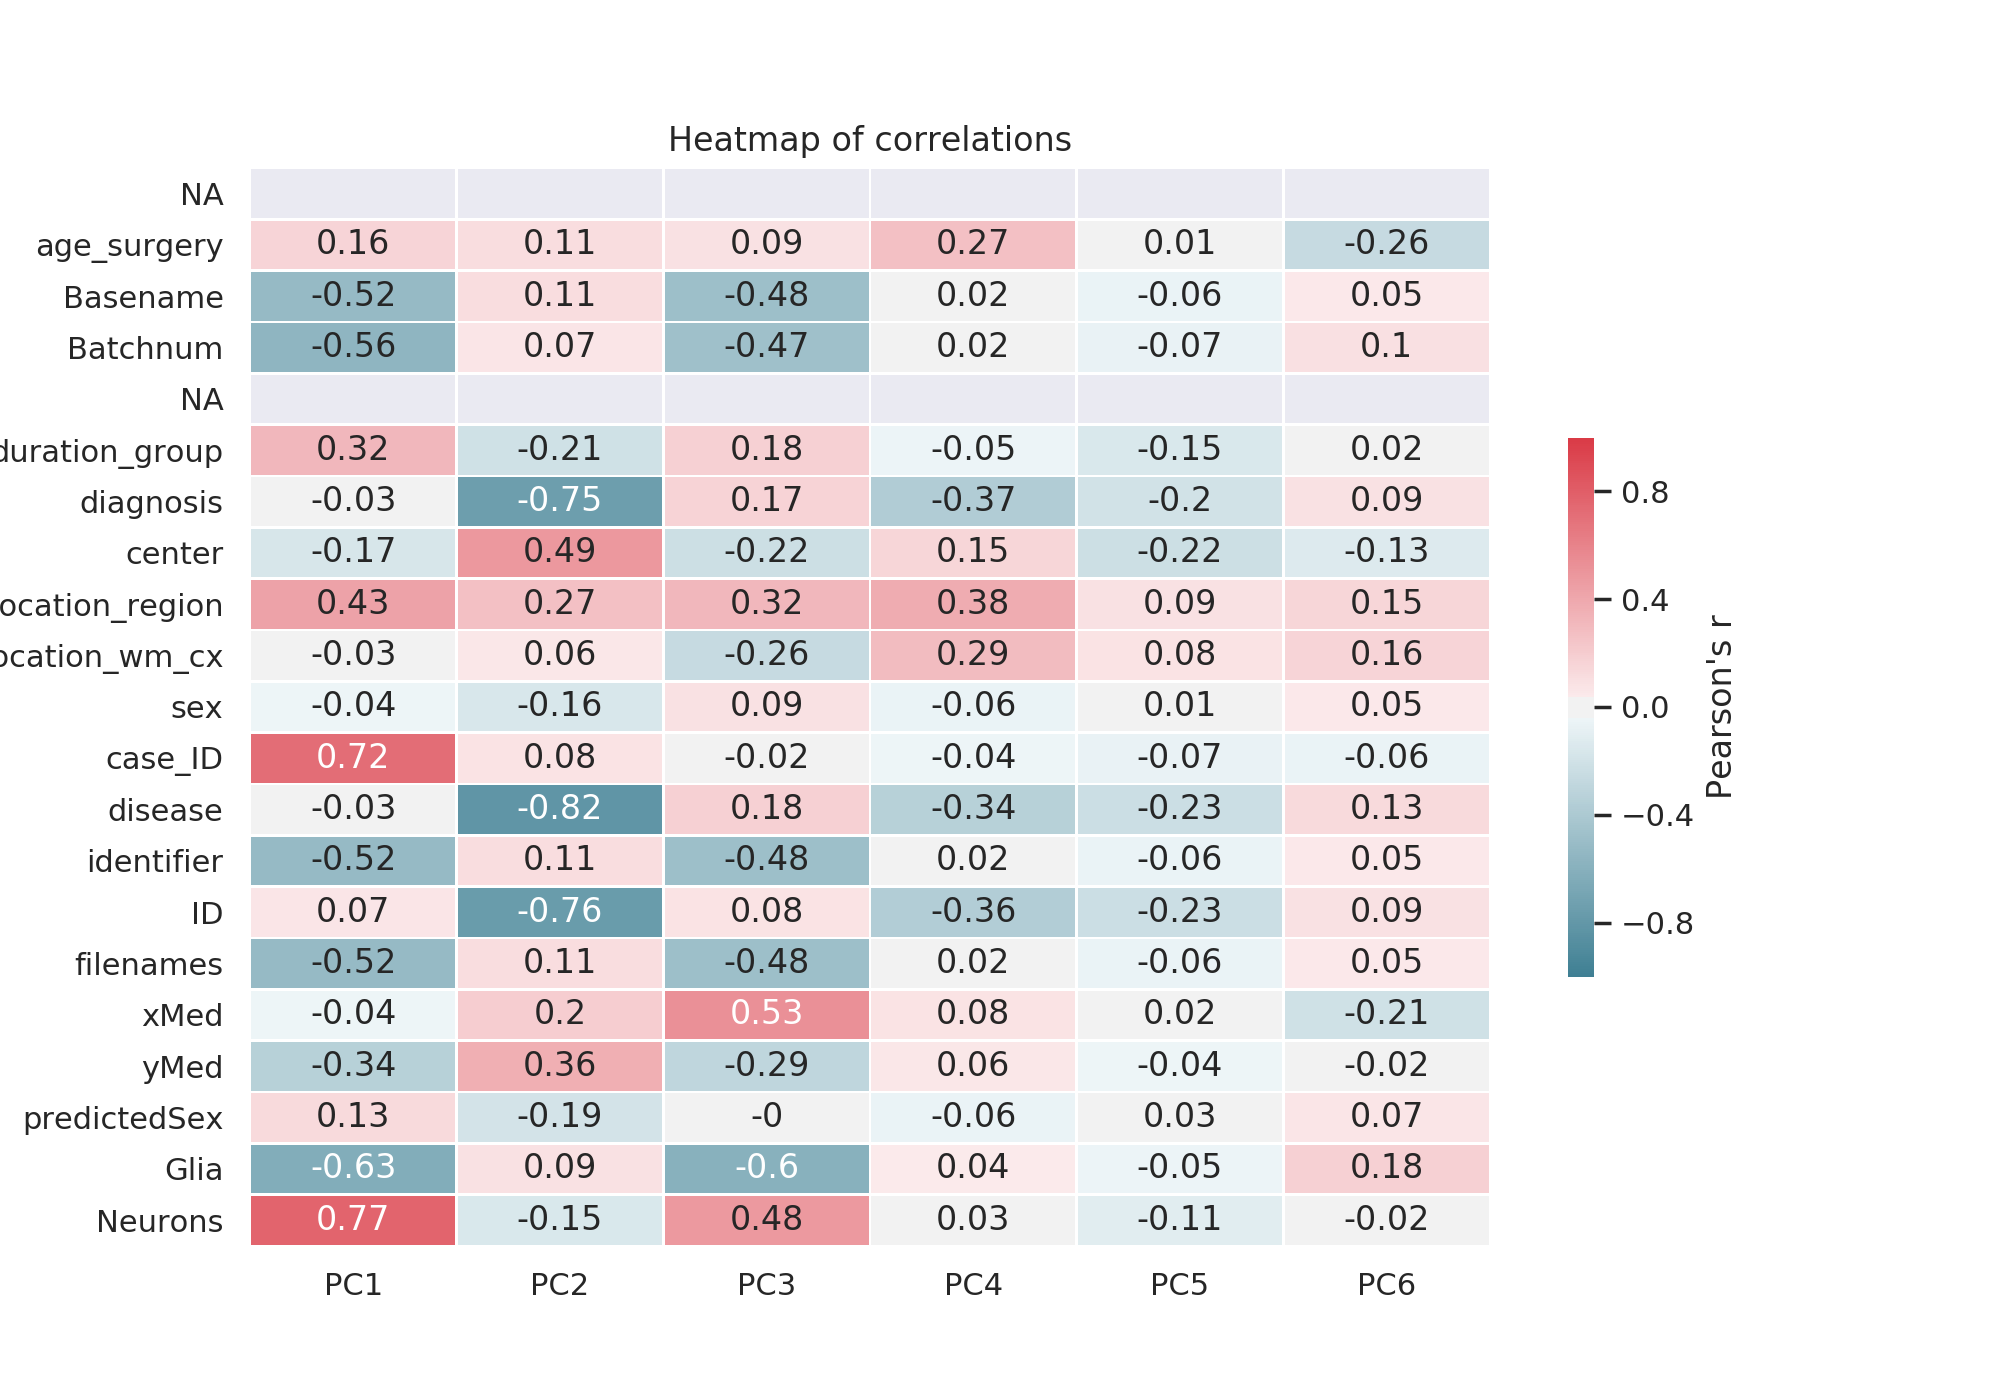

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [62]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [217]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['age_surgery'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=100, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'FCD 3B-TLE/CTRL', 2: 'FCD 3B-TSC', 3: 'TLE/CTRL-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x7fb3fce9f1f0>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation
Computing contrasts for experiment
done


In [218]:
len(preproidat.dmps)

270

In [219]:
preproidat.dectest

diseaseFCD.3B-diseaseTLE.CTRL  diseaseFCD.3B-diseaseTSC  \
Down                          60991.0                   33295.0   
NotSig                       311360.0                  372631.0   
Up                            66204.0                   32629.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       78182.0  
NotSig                    284519.0  
Up                         75854.0

In [220]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    1.625523                    1.376656   
cg23454205                    3.606623                    2.449581   
cg07721625                   -0.673060                   -1.126525   
cg18836486                    0.218615                    0.509064   
cg15119954                    2.140472                    2.109155   
...                                ...                         ...   
cg24214168                    1.866858                    1.287726   
cg17374034                    2.748050                    2.005099   
cg09185990                    1.354958                    0.823633   
cg09641623                    1.240610                    1.904411   
cg26380756                   -5.875005                   -3.896186   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    1.482889                    1.619948   
cg23454205                    2.572846                    3.018373   
cg07721625                   -0.880164                   -1.533080   
cg18836486                   -0.011995                    0.645817   
cg15119954                    1.985843                    1.586965   
...                                ...                         ...   
cg24214168                    1.581110                    2.219128   
cg17374034                    2.494106                    2.367854   
cg09185990                    0.893197                    1.033521   
cg09641623                    1.763762                    1.753078   
cg26380756                   -4.920380                   -4.694199   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.530241                    1.456649   
cg23454205                    2.761661                    2.773963   
cg07721625                   -1.396608                   -1.417659   
cg18836486                   -0.176232                    0.166508   
cg15119954                   -0.389821                    1.931511   
...                                ...                         ...   
cg24214168                    1.941515                    1.471517   
cg17374034                    2.470539                    3.329943   
cg09185990                    1.415032                    1.491031   
cg09641623                    1.384417                    1.678793   
cg26380756                   -5.501275                   -4.962775   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.677050                    1.367676   
cg23454205                    2.685009                    3.453505   
cg07721625                   -0.160210                   -1.467883   
cg18836486                   -0.033176                    0.613579   
cg15119954                    1.946269                    1.069929   
...                                ...                         ...   
cg24214168                    2.035801                    1.976636   
cg17374034                    2.692169                    2.928712   
cg09185990                    1.676090                    1.815277   
cg09641623                    2.291132                    2.149569   
cg26380756                   -4.898247                   -4.696603   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    1.412991                    1.470420  ...   
cg23454205                    3.252103                    3.189240  ...   
cg07721625                   -0.794824                   -0.819848  ...   
cg18836486                    0.184410                   -0.046173  ...   
cg15119954                    1.278142                    1.085269  ...   
...                                ...                         ...  ...   
cg24214168                    1.799948                    1.785057  ...   
cg17374034                    2.933855          

In [221]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    0.755234                    0.721964   
cg23454205                    0.924136                    0.845263   
cg07721625                    0.385438                    0.314137   
cg18836486                    0.537811                    0.587310   
cg15119954                    0.815125                    0.811832   
...                                ...                         ...   
cg24214168                    0.784825                    0.709423   
cg17374034                    0.870434                    0.800565   
cg09185990                    0.718935                    0.638971   
cg09641623                    0.702645                    0.789188   
cg26380756                    0.016754                    0.062936   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    0.736501                    0.754519   
cg23454205                    0.856111                    0.890140   
cg07721625                    0.352040                    0.256803   
cg18836486                    0.497921                    0.610079   
cg15119954                    0.798425                    0.750260   
...                                ...                         ...   
cg24214168                    0.749499                    0.823200   
cg17374034                    0.849257                    0.837708   
cg09185990                    0.650018                    0.671810   
cg09641623                    0.772511                    0.771207   
cg26380756                    0.031967                    0.037192   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.590863                    0.732956   
cg23454205                    0.871494                    0.872446   
cg07721625                    0.275268                    0.272367   
cg18836486                    0.469499                    0.528822   
cg15119954                    0.432857                    0.792296   
...                                ...                         ...   
cg24214168                    0.793435                    0.734968   
cg17374034                    0.847153                    0.909549   
cg09185990                    0.727272                    0.737595   
cg09641623                    0.723043                    0.761995   
cg26380756                    0.021601                    0.031070   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.615217                    0.720713   
cg23454205                    0.865426                    0.916352   
cg07721625                    0.472266                    0.265523   
cg18836486                    0.494251                    0.604751   
cg15119954                    0.793974                    0.677350   
...                                ...                         ...   
cg24214168                    0.803941                    0.797396   
cg17374034                    0.866003                    0.883914   
cg09185990                    0.761655                    0.778725   
cg09641623                    0.830347                    0.816073   
cg26380756                    0.032446                    0.037132   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    0.726991                    0.734820  ...   
cg23454205                    0.905011                    0.901199  ...   
cg07721625                    0.365649                    0.361635  ...   
cg18836486                    0.531912                    0.492000  ...   
cg15119954                    0.708052                    0.679669  ...   
...                                ...                         ...  ...   
cg24214168                    0.776889                    0.775095  ...   
cg17374034                    0.884279          

<IPython.core.display.Javascript object>


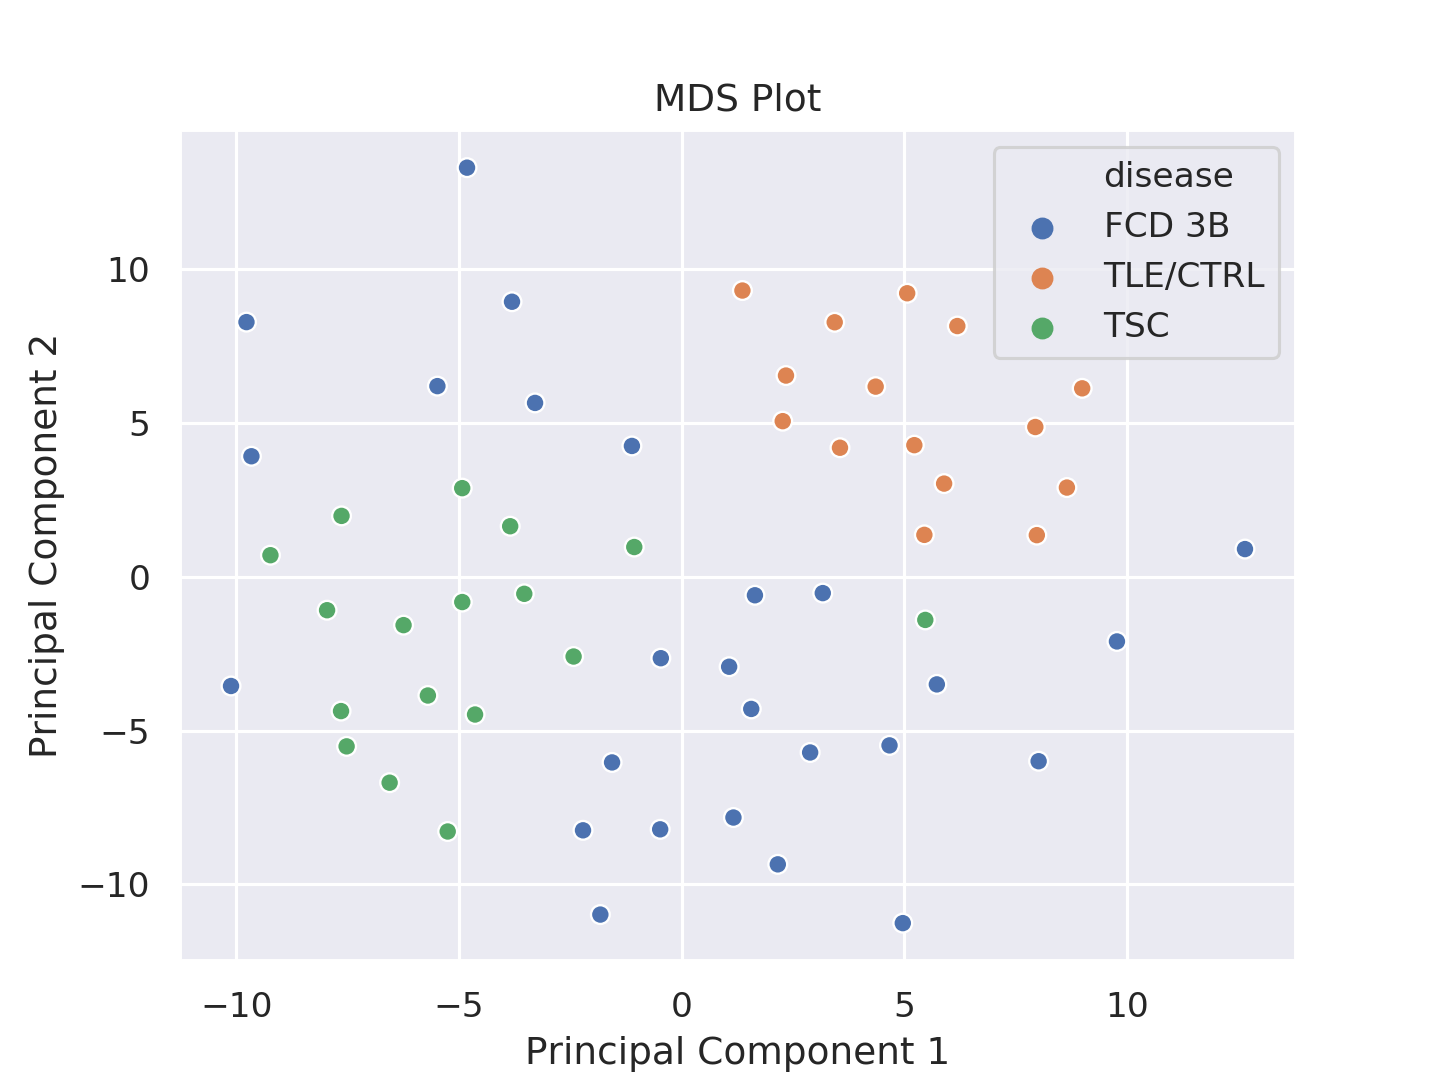

In [222]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

In [223]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.11927628517150879 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [224]:
embedding.shape

(58, 2)

In [225]:
preproidat.pheno_py[group].unique()

array(['FCD 3B', 'TLE/CTRL', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


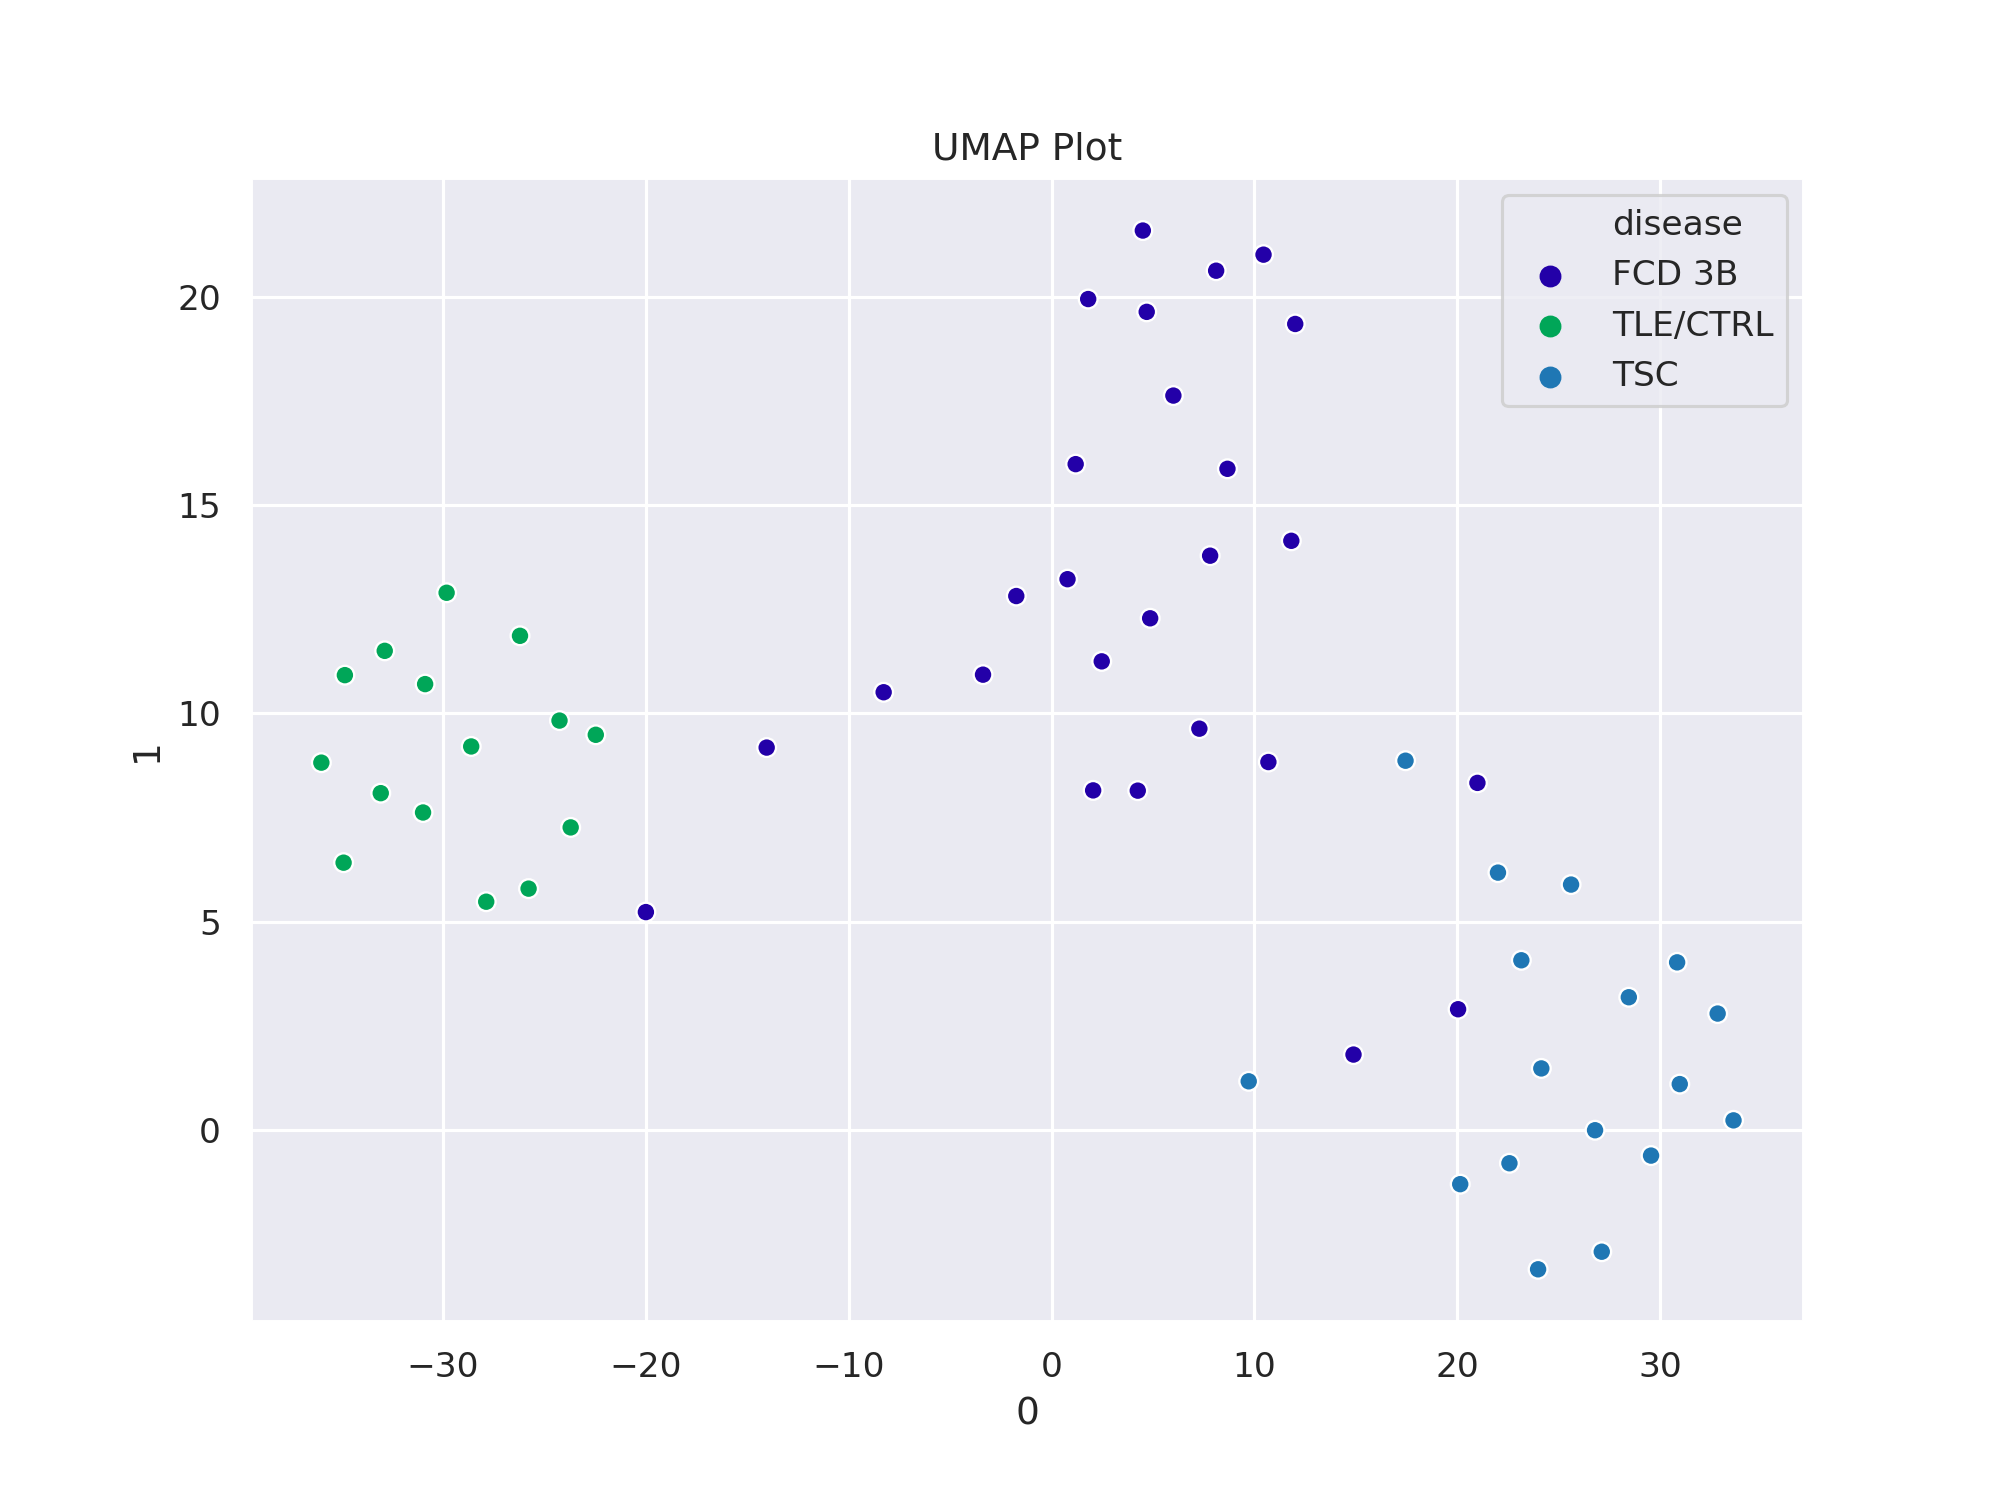

In [226]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [105]:
mval_10000.to_csv('mval_10000.csv', index=False)
beta_10000.to_csv('beta_10000.csv', index=False)
pheno.to_csv('pheno.csv', index=False)

In [66]:
mval_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg13211021                  2.134935                 -0.267658   
cg21099767                  1.286169                  1.470445   
cg07872854                  2.509267                  2.686531   
cg02510381                  2.442296                 -0.267658   
cg19866944                  2.185841                 -0.267658   
...                              ...                       ...   
cg26340968                  2.359707                  1.766196   
cg22498143                  1.395750                  1.123513   
cg07435331                  0.147186                  0.028006   
cg23401282                  1.274249                  0.996342   
cg07732348                  0.703665                  0.174892   

            CTRL.202818860053_R06C01  CTRL.202818860053_R07C01  \
cg13211021                  1.108773                  1.689598   
cg21099767                  3.140734                  0.476749   
cg07872854                  2.683560                 -0.362464   
cg02510381                  2.463107                 -0.362464   
cg19866944                 -0.218542                 -0.362464   
...                              ...                       ...   
cg26340968                  2.405455                  0.207839   
cg22498143                  1.999160                  0.801021   
cg07435331                  0.395173                  0.102514   
cg23401282                  1.826537                  0.856264   
cg07732348                 -0.056589                 -0.657828   

            CTRL.202818860053_R08C01  CTRL.202931510124_R01C01  \
cg13211021                  1.492799                  0.993806   
cg21099767                  2.197652                  1.445300   
cg07872854                  1.281631                  1.942652   
cg02510381                  1.147157                  2.438683   
cg19866944                 -0.232936                 -0.226156   
...                              ...                       ...   
cg26340968                  1.914919                  0.545024   
cg22498143                  2.126898                  0.757936   
cg07435331                  1.110374                 -0.403649   
cg23401282                  1.410207                  1.195406   
cg07732348                  0.391310                 -0.982195   

            CTRL.202931510124_R02C01  CTRL.202931510124_R03C01  \
cg13211021                 -0.467027                 -0.414829   
cg21099767                 -0.467027                 -0.414829   
cg07872854                 -0.467027                 -0.414829   
cg02510381                 -0.467027                 -0.414829   
cg19866944                 -0.467027                 -0.414829   
...                              ...                       ...   
cg26340968                  2.543218                  0.958906   
cg22498143                  0.964945                  0.030419   
cg07435331                  0.802401                  0.508018   
cg23401282                  1.386009                  1.000983   
cg07732348                  0.594276                  0.040423   

            CTRL.202931510124_R04C01  CTRL.202931510124_R05C01  ...  \
cg13211021                  2.940701                  2.545059  ...   
cg21099767                  2.174476                  1.176167  ...   
cg07872854                  3.270340                  0.023084  ...   
cg02510381                  2.548559                  2.055397  ...   
cg19866944                  2.043431                  1.995368  ...   
...                              ...                       ...  ...   
cg26340968                  1.507324                  1.250853  ...   
cg22498143                  1.567181                  1.129651  ...   
cg07435331                  0.582869                 -0.811750  ...   
cg23401282                  1.285192                  0.878997  ...   
cg07732348                 -0.510107                 -0.901

In [106]:
embedding_encods=pd.DataFrame(embedding, index=mval_10000.transpose().index)

In [107]:
embedding_encods.to_csv('embeddings.csv')